<a href="https://colab.research.google.com/github/SamaraMoreira/EcoOcean-IA/blob/main/EcoOcean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Data set "Water pollution in EU countries"

Link: https://www.kaggle.com/datasets/hydramst/water-pollution

**Colunas:**

- 'Código' é um código único do determinante controlado determinado na lista de códigos.
- 'Ano' - o ano durante o qual os dados foram selecionados.
- 'Período' é o período do ano durante o qual os dados foram selecionados.
- 'ID' é um identificador internacional único do corpo d'água no qual os dados foram obtidos.
- 'País' - informações sobre o país criadas usando coordenadas.
- 'Turistas' - o número médio de turistas no país de 1990 a 2020.
- 'Estabelecimentos' - o número de empresas próximas às coordenadas indicadas.
- 'Taxa' - nível de alfabetização no país de 2010 a 2018.
- 'Alimento' - participação de resíduos alimentares.
- 'Vidro' - participação de resíduos de vidro.
- 'Metal' é a participação de resíduos de metal.
- 'Outros' - participação de outros resíduos.
- 'Papel' é a participação de resíduos de papel.
- 'Plástico' é a participação de resíduos de plástico.
- 'Couro' - participação de resíduos de couro.
- 'Resíduos_verdes' - participação de resíduos verdes.
- 'Reciclagem_de_resíduos' - participação de lixo processado.

In [4]:
WaterPollution = pd.read_csv('/content/sample_data/Train.csv')

In [5]:
WaterPollution.head()

,Unnamed: 0,code,year,period,id,Country,tourists,venue,rate,food,glass,metal,other,paper,plastic,leather,green_waste,waste_recycling
0,6,CAS_7723-14-0,2009,2009-01--2009-12,ES014MSPFES-014-NR-038-000-02-02,Spain,50941692.0,4.0,87.158924,49.0,8.0,3.0,14.0,15.0,9.0,0.0,0.0,16.84
1,10,CAS_7723-14-0,2009,2009-01--2009-12,FRGR0220,France,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
2,17,CAS_14265-44-2,2009,2009-01--2009-12,FRGR1496,France,71176346.0,4.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
3,24,CAS_7723-14-0,2009,2009-01--2009-12,FRDR174,France,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
4,34,CAS_7723-14-0,2009,2009-01--2009-12,FRGR1022,France,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26


In [6]:
colunas_presentes = WaterPollution.columns
print("Colunas presentes no DataFrame WaterPollution:")
print(colunas_presentes)


Colunas presentes no DataFrame WaterPollution:
Index(['Unnamed: 0', 'code', 'year', 'period', 'id', 'Country', 'tourists',
       'venue', 'rate', 'food', 'glass', 'metal', 'other', 'paper', 'plastic',
       'leather', 'green_waste', 'waste_recycling'],
      dtype='object')


In [7]:
print(WaterPollution.describe())

         Unnamed: 0         year      tourists        venue         rate  \
count   2318.000000  2318.000000  2.318000e+03  2318.000000  2318.000000   
mean   10071.138481  2008.623382  4.764561e+07     0.090164     9.162948   
std     5737.044963     1.187660  2.482924e+07     0.599293    25.544159   
min        6.000000  2005.000000  5.300380e+05     0.000000     0.000000   
25%     5224.500000  2008.000000  2.586796e+07     0.000000     0.000000   
50%    10055.500000  2009.000000  5.094169e+07     0.000000     0.000000   
75%    14778.000000  2009.000000  7.117635e+07     0.000000     0.000000   
max    19908.000000  2017.000000  7.117635e+07     7.000000    87.158924   

              food        glass        metal        other        paper  \
count  2318.000000  2318.000000  2318.000000  2318.000000  2318.000000   
mean     29.396247     7.438378     3.143024    24.262079    19.625164   
std       9.747193     3.462916     0.996587     6.334736     4.124481   
min      14.180000 

### Análise das Estatísticas

#### Coluna `Unnamed: 0`
- Índice ou ID único, variando de 6 a 19908.

#### Coluna `year`
- Anos variam de 2005 a 2017.
- Média do ano é 2008.6, com a maioria dos dados concentrados em torno de 2008-2009 (mediana e quartis).

#### Coluna `tourists`
- Número médio de turistas é aproximadamente 47.6 milhões, com um desvio padrão considerável (24.8 milhões).
- Existe uma grande variação no número de turistas entre os diferentes anos/países.

#### Coluna `venue`
- Valores variam de 0 a 7, com a maioria dos valores sendo 0 (mediana e quartis).

#### Coluna `rate`
- Valores variam de 0 a 87.16, com uma média de 9.16 e um desvio padrão de 25.54.
- Mediana e quartis sugerem que muitos valores são próximos de 0.

#### Coluna `food`
- Quantidade média de resíduos alimentares é 29.40, com valores variando de 14.18 a 62.30.
- A maioria dos dados está entre 16.7 e 32.

#### Coluna `glass`
- Quantidade média de resíduos de vidro é 7.44, com valores variando de 2.2 a 21.4.
- Há uma concentração maior de valores em torno de 2.2 e 10.

#### Coluna `metal`
- Quantidade média de resíduos de metal é 3.14, com valores variando de 1.38 a 9.2.
- A maioria dos dados está entre 3 e 3.5.

#### Coluna `other`
- Quantidade média de outros resíduos é 24.26, com valores variando de 0 a 44.05.
- A maioria dos dados está em torno de 26.

#### Coluna `paper`
- Quantidade média de resíduos de papel é 19.63, com valores variando de 6.1 a 37.83.
- A maioria dos dados está em torno de 20.

#### Coluna `plastic`
- Quantidade média de resíduos plásticos é 12.14, com valores variando de 1.45 a 22.9.
- A maioria dos dados está entre 9 e 20.2.

#### Coluna `leather`
- Quantidade média de resíduos de couro é 0.21, com valores variando de 0 a 4.
- A maioria dos dados é 0.

#### Coluna `green_waste`
- Quantidade média de resíduos verdes é 1.52, com valores variando de 0 a 19.18.
- A maioria dos dados é 0.

#### Coluna `waste_recycling`
- Taxa média de reciclagem de resíduos é 24.33, com valores variando de 0.76 a 47.83.
- A maioria dos dados está entre 22.26 e 27.25.


In [ ]:
# Verificar valores ausentes
print(WaterPollution.isnull().sum())

Unnamed: 0          0
code                0
year                0
period              0
id                  0
Country            17
tourists            0
venue               0
rate                0
food                0
glass               0
metal               0
other               0
paper               0
plastic             0
leather             0
green_waste         0
waste_recycling     0
dtype: int64


In [8]:
paises = WaterPollution['Country'].unique()

# Exibir a lista de países
print(paises)

['Spain' 'France' 'Austria' 'United Kingdom' 'Bulgaria' 'Germany'
 'Belgium' 'Lithuania' 'Italy' 'Finland' nan 'Sweden' 'Czech Republic'
 'Portugal' 'Serbia' 'Netherlands' 'Ireland' 'Switzerland' 'Latvia'
 'Luxembourg' 'Croatia' 'Norway' 'Romania']


In [9]:
# 1. Agrupar os dados por país e ano
grouped_data = WaterPollution.groupby(['Country', 'year'])

# 2. Calcular a contagem de cada tipo de lixo para cada grupo
historico = grouped_data[['food', 'glass', 'metal', 'other', 'paper', 'plastic', 'leather', 'green_waste', 'waste_recycling']].sum()

# 3. Exibir o histórico
print(historico)

                         food    glass    metal     other     paper  plastic  \
Country        year                                                            
Austria        2005     62.80    14.00     8.80     37.00     39.40    22.20   
               2006     94.20    21.00    13.20     55.50     59.10    33.30   
               2007     62.80    14.00     8.80     37.00     39.40    22.20   
               2008     31.40     7.00     4.40     18.50     19.70    11.10   
               2009     94.20    21.00    13.20     55.50     59.10    33.30   
               2010     62.80    14.00     8.80     37.00     39.40    22.20   
               2011    471.00   105.00    66.00    277.50    295.50   166.50   
Belgium        2008    170.16    37.20    22.92    481.68    220.56   167.28   
               2009    184.34    40.30    24.83    521.82    238.94   181.22   
               2010     14.18     3.10     1.91     40.14     18.38    13.94   
               2015     14.18     3.10  

In [10]:
df_numeric = WaterPollution.apply(pd.to_numeric, errors='coerce')

# Calcular a soma de todas as quantidades de lixo para cada ano
soma_por_ano = df_numeric.groupby('year').sum()

# Encontrar o ano com a maior soma
ano_maior_coleta = soma_por_ano.sum(axis=1).idxmax()
quantidade_maior_coleta = soma_por_ano.sum(axis=1).max()

print("Ano com a maior quantidade de coleta de lixo:", ano_maior_coleta)
print("Quantidade total de coleta de lixo nesse ano:", quantidade_maior_coleta)

Ano com a maior quantidade de coleta de lixo: 2009
Quantidade total de coleta de lixo nesse ano: 51288326109.37245


In [11]:
# Função para calcular a quantidade total de lixo coletado por tipo
def calcular_quantidade_total(WaterPollution):
    total_por_tipo = {}
    for tipo in WaterPollution.columns[9:]:  # Começando da décima coluna, que corresponde aos tipos de lixo
        quantidade_total = WaterPollution[tipo].sum()  # Soma da quantidade de lixo para cada tipo
        total_por_tipo[tipo] = quantidade_total
    return total_por_tipo

# Calcular a quantidade total de lixo coletado por tipo
quantidade_total_por_tipo = calcular_quantidade_total(WaterPollution)

# Imprimir os resultados
for tipo, quantidade_total in quantidade_total_por_tipo.items():
    print(f"Tipo de lixo: {tipo}, Quantidade total: {quantidade_total} kg")


Tipo de lixo: food, Quantidade total: 68140.5 kg
Tipo de lixo: glass, Quantidade total: 17242.160000000003 kg
Tipo de lixo: metal, Quantidade total: 7285.53 kg
Tipo de lixo: other, Quantidade total: 56239.5 kg
Tipo de lixo: paper, Quantidade total: 45491.130000000005 kg
Tipo de lixo: plastic, Quantidade total: 28147.54 kg
Tipo de lixo: leather, Quantidade total: 484.48 kg
Tipo de lixo: green_waste, Quantidade total: 3527.83 kg
Tipo de lixo: waste_recycling, Quantidade total: 56386.001 kg


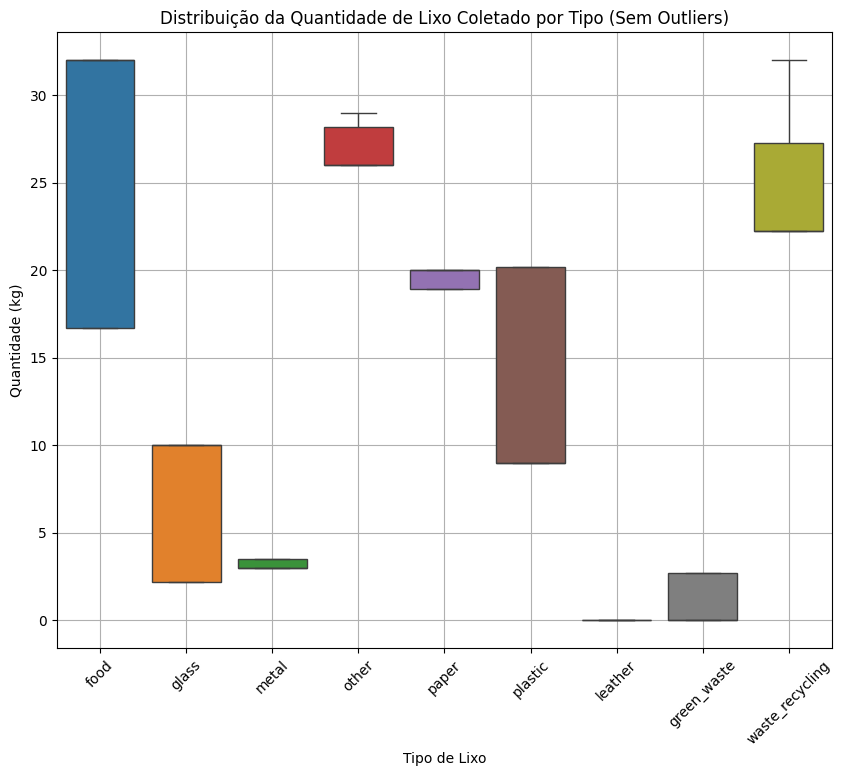

In [12]:
# Selecionar apenas as colunas dos tipos de lixo
columns_of_interest = WaterPollution.iloc[:, 9:]

# Calcular o Q1 (1º quartil), Q3 (3º quartil) e IQR (intervalo interquartil) para cada coluna
Q1 = columns_of_interest.quantile(0.25)
Q3 = columns_of_interest.quantile(0.75)
IQR = Q3 - Q1

# Calcular os limites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar os dados para remover outliers
filtered_data = columns_of_interest[~((columns_of_interest < lower_bound) |(columns_of_interest > upper_bound)).any(axis=1)]

# Gerar um boxplot com os dados filtrados
plt.figure(figsize=(10, 8))
sns.boxplot(data=filtered_data)
plt.title('Distribuição da Quantidade de Lixo Coletado por Tipo (Sem Outliers)')
plt.xlabel('Tipo de Lixo')
plt.ylabel('Quantidade (kg)')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para facilitar a leitura
plt.grid(True)
plt.show()

In [13]:
# Selecionar as colunas relevantes para a análise
df_lixo = WaterPollution[['period', 'food', 'glass', 'metal', 'other', 'paper', 'plastic', 'leather', 'green_waste', 'waste_recycling']]

# Calcular a média da quantidade de lixo coletado para cada tipo de lixo em cada período
media_por_periodo = df_lixo.groupby('period').mean()

print(media_por_periodo)

                             food      glass     metal      other      paper  \
period                                                                         
2005-01--2005-12        31.400000   7.000000  4.400000  18.500000  19.700000   
2006-01--2006-12        17.380463   2.500000  3.540000  27.750463  19.013611   
2007-01--2007-12        17.316596   2.467447  3.491702  28.128723  18.897234   
2007-12--2008-02        35.880000   9.240000  1.700000  13.130000  37.830000   
2008-01--2008-12        27.774061   7.394130  3.366485  25.284932  20.025683   
2008-06--2008-08        35.880000   9.240000  1.700000  13.130000  37.830000   
2008-12--2009-02        35.880000   9.240000  1.700000  13.130000  37.830000   
2009-01--2009-12        32.444913   8.605220  2.987477  22.710102  19.588723   
2009-06--2009-08        35.880000   9.240000  1.700000  13.130000  37.830000   
2009-12--2010-02        35.880000   9.240000  1.700000  13.130000  37.830000   
2010-01--2010-12        33.858507   9.04

### Tendências Gerais
1. **Aumento Flutuante dos Resíduos**:
   - Observa-se que a quantidade de resíduos flutua consideravelmente ao longo dos anos. Por exemplo, em 2009, houve um pico significativo em várias categorias de resíduos como 'glass', 'metal' e 'other'.

2. **Padrões Sazonais**:
   - Alguns anos, especialmente os mais recentes, mostram dados trimestrais que indicam padrões sazonais na geração de resíduos. Isso é evidente nas repetições de dados trimestrais, como o aumento nos períodos de verão (junho a agosto) e inverno (dezembro a fevereiro).



Top 3 países para o tipo de lixo 'food':
1. France: 35200.0 kg
2. Spain: 10780.0 kg
3. United Kingdom: 10170.3 kg




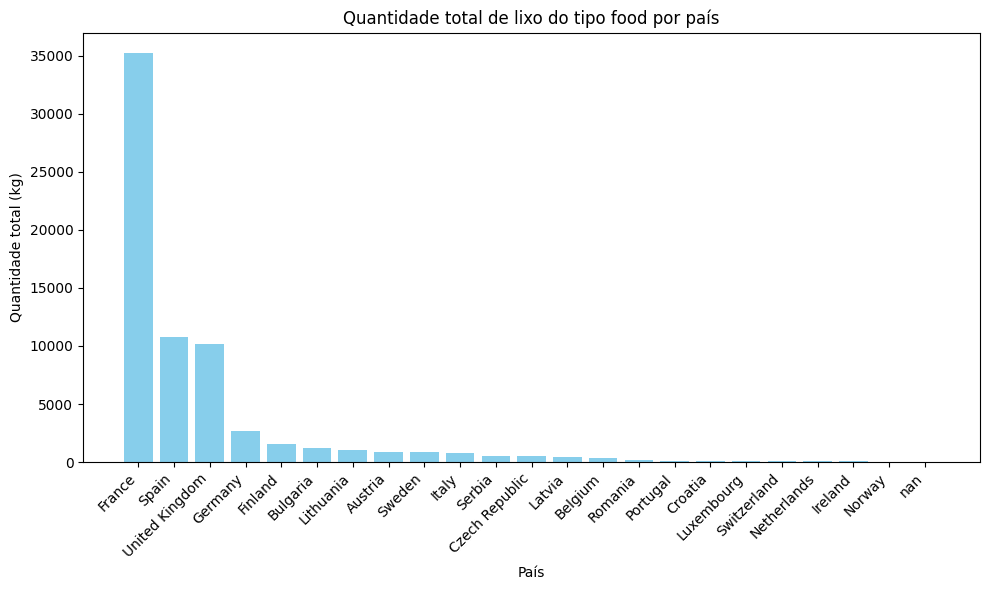

Top 3 países para o tipo de lixo 'glass':
1. France: 11000.0 kg
2. Spain: 1760.0 kg
3. United Kingdom: 1339.7999999999997 kg




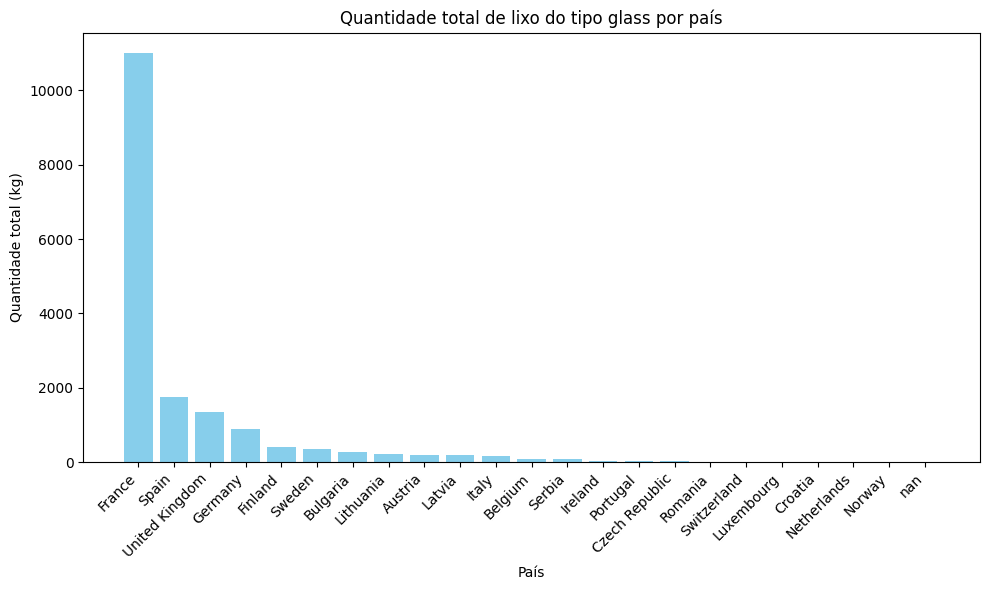

Top 3 países para o tipo de lixo 'metal':
1. France: 3300.0 kg
2. United Kingdom: 2131.5 kg
3. Spain: 660.0 kg




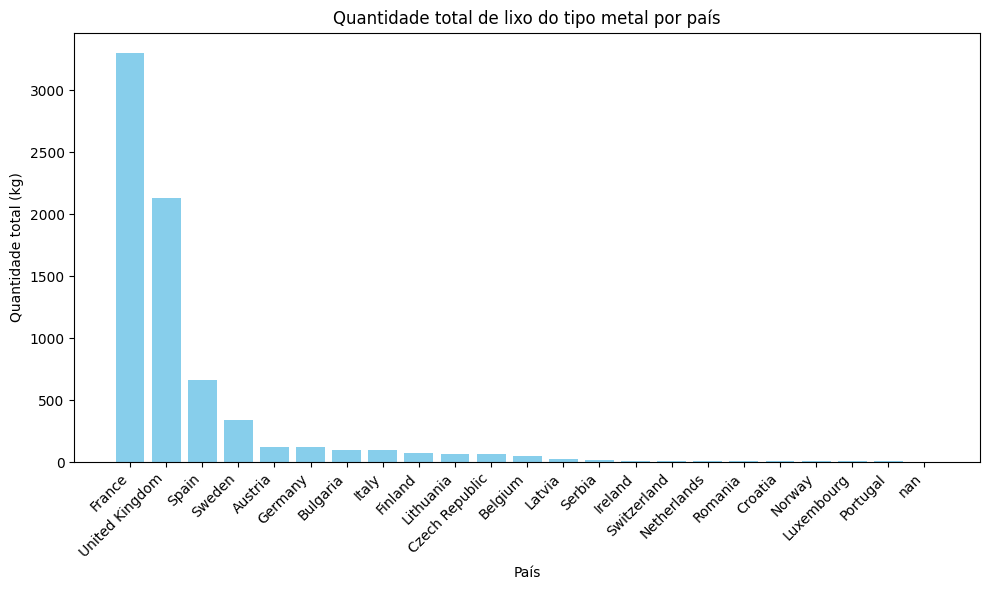

Top 3 países para o tipo de lixo 'other':
1. France: 28600.0 kg
2. United Kingdom: 17173.799999999996 kg
3. Spain: 3080.0 kg




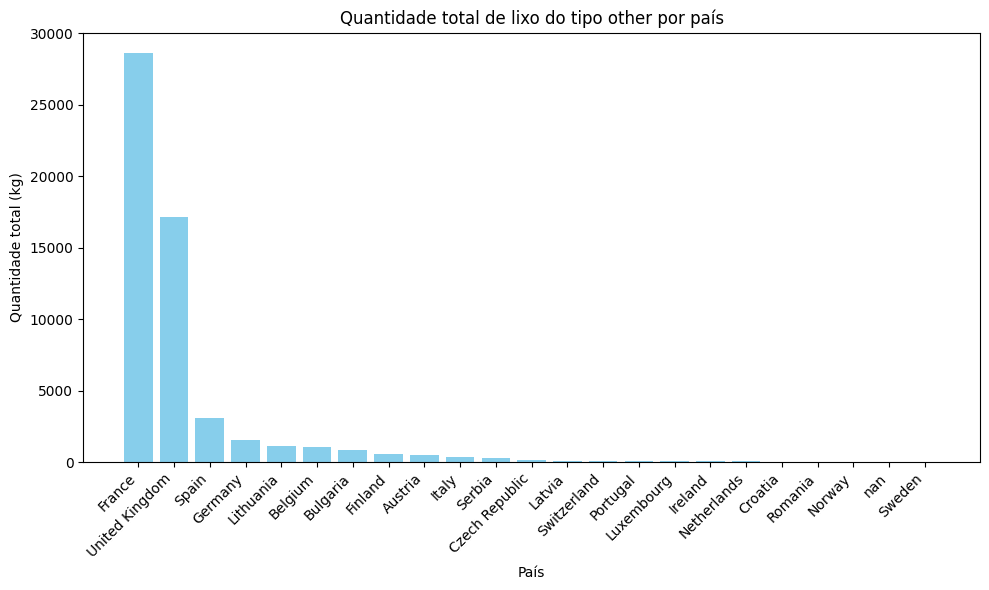

Top 3 países para o tipo de lixo 'paper':
1. France: 22000.0 kg
2. United Kingdom: 11510.100000000002 kg
3. Spain: 3300.0 kg




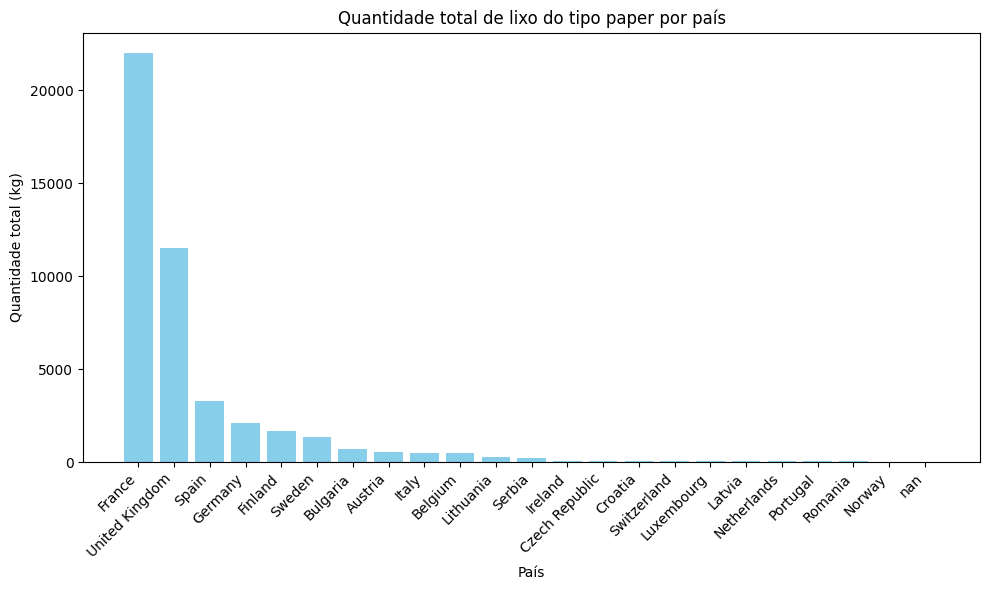

Top 3 países para o tipo de lixo 'plastic':
1. United Kingdom: 12301.8 kg
2. France: 9900.0 kg
3. Spain: 1980.0 kg




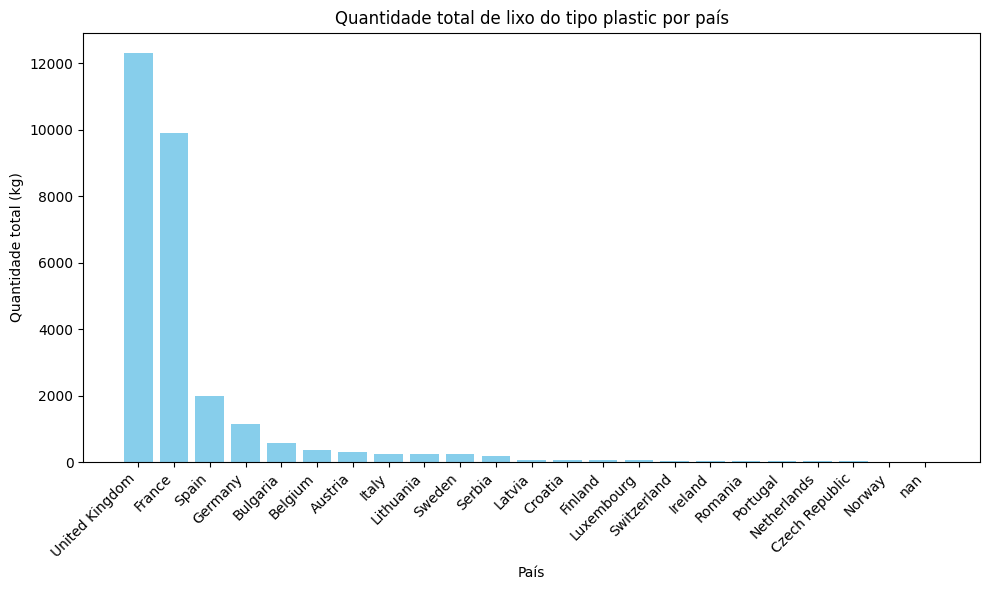

Top 3 países para o tipo de lixo 'leather':
1. Germany: 352.0 kg
2. Bulgaria: 94.08000000000001 kg
3. Latvia: 32.4 kg




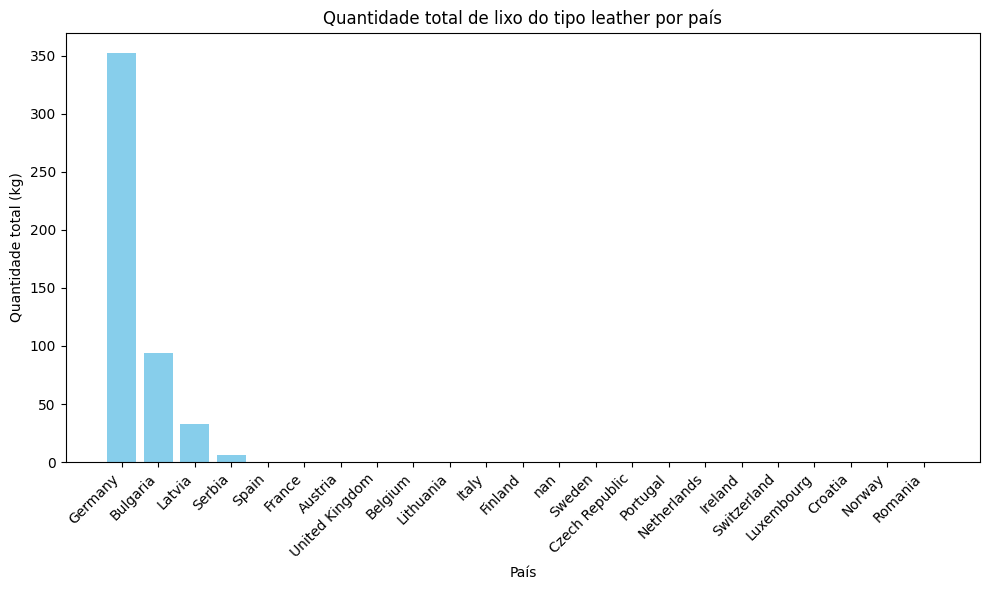

Top 3 países para o tipo de lixo 'green_waste':
1. United Kingdom: 1644.2999999999997 kg
2. Bulgaria: 920.6400000000001 kg
3. Sweden: 567.2100000000002 kg




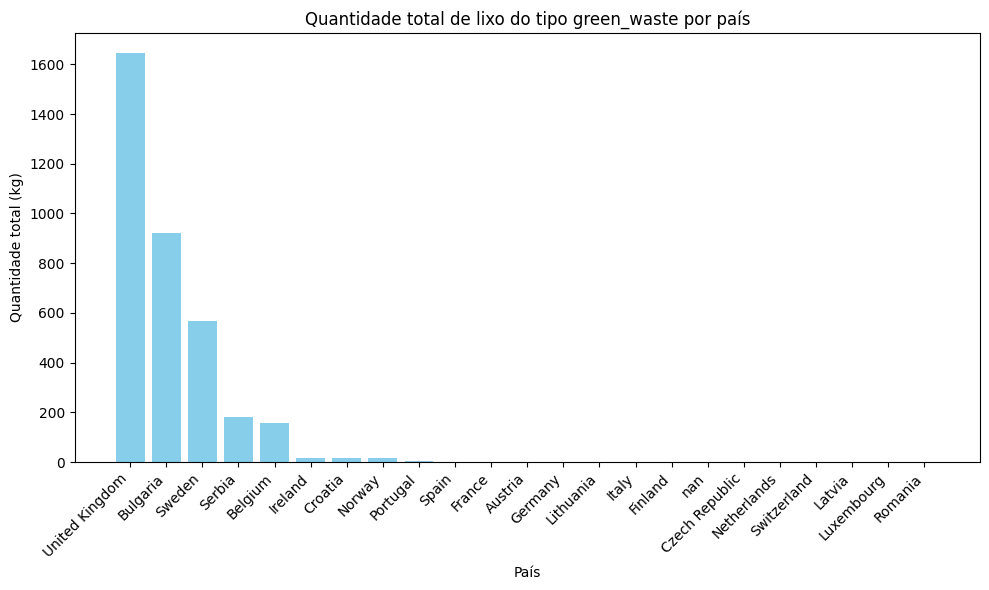

Top 3 países para o tipo de lixo 'waste_recycling':
1. France: 24485.999999999996 kg
2. United Kingdom: 16595.25 kg
3. Germany: 4209.039999999999 kg




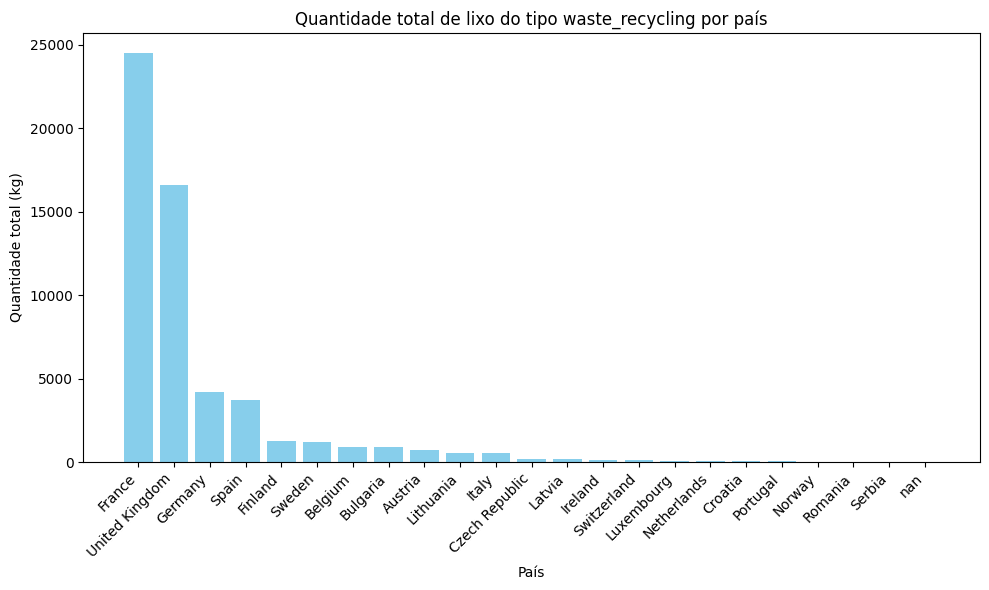

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Função para calcular a quantidade total de lixo por tipo de lixo e país
def calcular_quantidade_total_por_tipo_e_pais(WaterPollution, tipo):
    quantidade_total_por_pais = {}
    for pais in WaterPollution['Country'].unique():
        quantidade_total = WaterPollution[WaterPollution['Country'] == pais][tipo].sum()
        quantidade_total_por_pais[pais] = quantidade_total
    return quantidade_total_por_pais

# Tipos de lixo disponíveis
tipos_lixo = ['food', 'glass', 'metal', 'other', 'paper', 'plastic', 'leather', 'green_waste', 'waste_recycling']

# Gerar gráficos e listar os 3 países com maior quantidade de lixo para cada tipo
for tipo in tipos_lixo:
    # Calcular a quantidade total de lixo por tipo de lixo e país
    quantidade_total_por_pais = calcular_quantidade_total_por_tipo_e_pais(WaterPollution, tipo)

    # Ordenar os países de acordo com a quantidade total de lixo
    paises_ordenados = sorted(quantidade_total_por_pais, key=quantidade_total_por_pais.get, reverse=True)
    quantidades_ordenadas = [quantidade_total_por_pais[pais] for pais in paises_ordenados]

    # Imprimir os 3 países com maior quantidade de lixo para o tipo atual
    top_3_paises = paises_ordenados[:3]
    top_3_quantidades = quantidades_ordenadas[:3]
    print(f"Top 3 países para o tipo de lixo '{tipo}':")
    for i in range(3):
        print(f"{i+1}. {top_3_paises[i]}: {top_3_quantidades[i]} kg")
    print("\n")

    # Converter os rótulos dos países para strings
    paises_ordenados_str = [str(pais) for pais in paises_ordenados]

    # Criar o gráfico de barras
    plt.figure(figsize=(10, 6))
    plt.bar(paises_ordenados_str, quantidades_ordenadas, color='skyblue')
    plt.title(f"Quantidade total de lixo do tipo {tipo} por país")
    plt.xlabel("País")
    plt.ylabel("Quantidade total (kg)")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Mostrar o gráfico
    plt.show()


# Novo DataSet

Com bases nos graficos e informações acima, conseguimos analisar que os países:

1. France
2. Spain
3. United Kingdom

Possuem os maiores registros de lixo encontrados. Seguindo essa ordem, iremos criar um novo DataSet com os registros apenas dos 3 países acima, sendo alterado para a sua numeração. Ou seja, ao invés de apresentar o nome do país, será apresentada a sua numeração.

In [15]:
# Filtrar os dados para os países France, Spain e United Kingdom
paises_selecionados = ['France', 'Spain', 'United Kingdom']
dados_filtrados = WaterPollution[WaterPollution['Country'].isin(paises_selecionados)].copy()

# Mapear os nomes dos países para sua numeração
mapeamento_paises = {
    'France': 1,
    'Spain': 2,
    'United Kingdom': 3
}

# Substituir os nomes dos países pela numeração
dados_filtrados['Country'] = dados_filtrados['Country'].map(mapeamento_paises)

# Exibir o novo DataFrame
print(dados_filtrados.head())

# Salvar o novo DataFrame em um arquivo CSV
dados_filtrados.to_csv('NewWaterPollution.csv', index=False)


   Unnamed: 0            code  year            period  \
0           6   CAS_7723-14-0  2009  2009-01--2009-12   
1          10   CAS_7723-14-0  2009  2009-01--2009-12   
2          17  CAS_14265-44-2  2009  2009-01--2009-12   
3          24   CAS_7723-14-0  2009  2009-01--2009-12   
4          34   CAS_7723-14-0  2009  2009-01--2009-12   

                                 id  Country    tourists  venue       rate  \
0  ES014MSPFES-014-NR-038-000-02-02        2  50941692.0    4.0  87.158924   
1                          FRGR0220        1  71176346.0    0.0   0.000000   
2                          FRGR1496        1  71176346.0    4.0   0.000000   
3                           FRDR174        1  71176346.0    0.0   0.000000   
4                          FRGR1022        1  71176346.0    0.0   0.000000   

   food  glass  metal  other  paper  plastic  leather  green_waste  \
0  49.0    8.0    3.0   14.0   15.0      9.0      0.0          0.0   
1  32.0   10.0    3.0   26.0   20.0      9.0    

# DataSet Coast Pollution Assessment

Link: https://www.kaggle.com/datasets/tzachymorad/shore-pollution-assessment


**Colunas:**


- Month: Representa o mês em que a amostra foi coletada.
- Season: Representa a estação do ano em que a amostra foi coletada.
- Shore: Indica a localização da amostra na costa.
- Pollution Level: Nível de poluição na amostra.
- Sample number: Número da amostra.
- Organic matter%: Percentual de matéria orgânica presente na amostra.
- Mean Number of Nematode species 1 per gram soil: Número médio de espécies de nematoides 1 por grama de solo.
- Mean Number of Turbillaria per gram soil: Número médio de Turbillaria por grama de solo.
- Mean Number of foraminefera per gram soil: Número médio de foraminíferos por grama de solo.
- Mean Number of Nematode species 2 per gram soil: Número médio de espécies de nematoides 2 por grama de solo.
- Water pH: pH da água.
- Soil pH: pH do solo.
- OC: Índice de carbono orgânico.
- Water Salinity: Salinidade da água.
- Soil Salinity: Salinidade do solo.
- P: Fósforo na amostra.
- Total dissolved solids: Sólidos totais dissolvidos na amostra.
- PP: Índice PP.
- Conduction: Condutividade elétrica.
- ORP: Potencial de oxirredução (ORP).
- Specific resistance: Resistência específica.
- Temp ©: Temperatura em Celsius.
- Conductivity: Condutividade.
- H: Hidrogênio na amostra.
- C-A: Índice C-A.
- C-B: Índice C-B.
- C-C: Índice C-C.

In [16]:
ShorePollution = pd.read_csv('/content/sample_data/Shore_Pollution.csv',encoding='latin1')

In [17]:
ShorePollution.head()

,Month,Season,Shore,Pollution Level,Sample number,Organic matter%,Mean Number of Nematode species 1 per gram soil,Mean Number of Turbillaria per gram soil,Mean Number of foraminefera per gram soil,Mean Number of Nematode species 2 per gram soil,Water pH,Soil pH,OC,Water Salinity,Soil Salinity,P,Total dissolved solids,PP,Conduction,ORP,Specific resistance,Temp ©,Conductivity,H,C-A,C-B,C-C
0,8,4,1,0,1,NaN,5.700000,0.155556,NaN,NaN,8.055,8.0,7.3,38.5,11.0,28.396893,57500.0,196.3,57400.0,-79.9,17.42,30.12,NaN,NaN,NaN,NaN,NaN
1,8,4,1,0,2,NaN,3.288889,0.066667,NaN,NaN,8.055,8.0,7.3,38.5,11.0,28.396893,57500.0,196.3,57400.0,-79.9,17.42,30.12,NaN,NaN,NaN,NaN,NaN
2,8,4,1,0,3,NaN,8.444444,0.000000,NaN,NaN,8.055,8.0,7.3,38.5,11.0,28.396893,57500.0,196.3,57400.0,-79.9,17.42,30.12,NaN,NaN,NaN,NaN,NaN
3,8,4,1,0,4,NaN,1.866667,0.000000,NaN,NaN,8.055,8.0,7.3,38.5,11.0,28.396893,57500.0,196.3,57400.0,-79.9,17.42,30.12,NaN,NaN,NaN,NaN,NaN
4,8,4,1,0,5,NaN,3.377778,0.022222,NaN,NaN,8.055,8.0,7.3,38.5,11.0,28.396893,57500.0,196.3,57400.0,-79.9,17.42,30.12,NaN,NaN,NaN,NaN,NaN


In [18]:
ShorePollution.describe()

,Month,Season,Shore,Pollution Level,Sample number,Organic matter%,Mean Number of Nematode species 1 per gram soil,Mean Number of Turbillaria per gram soil,Mean Number of foraminefera per gram soil,Mean Number of Nematode species 2 per gram soil,Water pH,Soil pH,OC,Water Salinity,Soil Salinity,P,Total dissolved solids,PP,Conduction,ORP,Specific resistance,Temp ©,Conductivity,H,C-A,C-B,C-C
count,219.000000,219.000000,219.000000,219.000000,219.000000,202.000000,219.000000,219.000000,147.000000,147.000000,219.000000,219.000000,205.000000,219.000000,212.000000,219.000000,205.000000,205.000000,219.000000,219.000000,205.000000,219.000000,175.000000,175.000000,119.000000,119.000000,119.000000
mean,6.598174,2.260274,2.004566,1.009132,6.347032,0.453037,6.366831,0.173318,15.070743,6.912258,8.184338,8.236772,7.995951,37.354795,9.830189,28.523048,56036.097561,238.343902,56280.821918,-79.267580,17.975805,23.879126,3.020466,0.148759,3.872215,4.110022,5.291357
std,4.993867,1.023047,0.815547,0.818316,3.796199,0.228357,6.078124,0.293938,14.410686,8.126480,0.106477,0.200989,0.897593,3.146078,2.483487,3.400412,4622.288754,27.825190,4353.022493,9.451445,1.816734,5.427084,0.942352,0.068690,4.114648,5.228892,6.498332
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.121183,0.000000,0.000000,0.000000,0.000000,7.801000,7.800000,6.450000,25.400000,5.000000,21.063842,37800.000000,196.300000,39500.000000,-90.200000,16.940000,14.700000,1.839800,0.058200,0.142662,0.000000,0.000000
25%,3.000000,1.000000,1.000000,0.000000,3.000000,0.295436,2.001938,0.000000,3.193056,0.695392,8.151000,8.100000,7.270000,38.100000,9.000000,25.981899,56300.000000,217.000000,56900.000000,-87.200000,17.070000,20.000000,2.287800,0.093100,0.606514,0.000000,0.249908
50%,5.000000,2.000000,2.000000,1.000000,6.000000,0.368151,3.955294,0.100389,9.876923,3.292308,8.188000,8.277000,8.390000,38.500000,10.000000,28.479067,57500.000000,232.000000,57800.000000,-84.000000,17.390000,24.020000,2.881300,0.135500,2.909987,2.546074,3.472716
75%,9.000000,3.000000,3.000000,2.000000,9.000000,0.543818,8.482385,0.232301,24.267521,9.600000,8.250000,8.412000,8.690000,39.000000,11.500000,31.172329,58400.000000,260.000000,58600.000000,-71.800000,17.810000,29.880000,3.252300,0.206100,8.220065,8.967643,11.445232
max,18.000000,4.000000,3.000000,2.000000,14.000000,1.868025,25.051736,3.114085,73.600000,38.978313,8.340000,8.599000,9.300000,39.600000,14.000000,35.122151,59000.000000,307.000000,59000.000000,-61.400000,25.700000,31.180000,5.234900,0.260300,12.950098,16.184113,20.296435


In [19]:
colunasShorePollution = ShorePollution.columns.values

In [20]:
colunasShorePollution

array(['Month', 'Season', 'Shore', 'Pollution Level', 'Sample number',
       'Organic matter%',
       'Mean Number of Nematode species 1 per gram soil',
       'Mean Number of Turbillaria per gram soil',
       'Mean Number of foraminefera per gram soil',
       'Mean Number of Nematode species 2 per gram soil', 'Water pH',
       'Soil pH', 'OC', 'Water Salinity', 'Soil Salinity', 'P',
       'Total dissolved solids ', 'PP', 'Conduction', 'ORP',
       'Specific resistance ', 'Temp ©', 'Conductivity', 'H', 'C-A',
       'C-B', 'C-C'], dtype=object)

In [21]:
# Verificar valores nulos por coluna
null_values = ShorePollution.isnull().sum()

# Exibir os valores nulos por coluna
print(null_values)

Month                                                0
Season                                               0
Shore                                                0
Pollution Level                                      0
Sample number                                        0
Organic matter%                                     17
Mean Number of Nematode species 1 per gram soil      0
Mean Number of Turbillaria per gram soil             0
Mean Number of foraminefera per gram soil           72
Mean Number of Nematode species 2 per gram soil     72
Water pH                                             0
Soil pH                                              0
OC                                                  14
Water Salinity                                       0
Soil Salinity                                        7
P                                                    0
Total dissolved solids                              14
PP                                                  14
Conduction

# Novo DataSet

Visando uma futura junção de datasets, realizei a alteração do nome da coluna Shore para Country, ambas colunas possuindo dados que varia de 1, 2 e 3. Além de apagar colunas que julguei pouco importante para a ánalise

In [22]:
NewShorePollution = ShorePollution.rename(columns={'Shore': 'Country'})

# Excluir as colunas 'H', 'C-A', 'C-B', 'C-C'
colunas_para_excluir = ['H', 'C-A', 'C-B', 'C-C']
NewShorePollution = NewShorePollution.drop(columns=colunas_para_excluir)

# Exibir o novo DataFrame
print(NewShorePollution.head())

# Se quiser salvar o novo DataFrame em um arquivo CSV
NewShorePollution.to_csv('NewShorePollution.csv', index=False)

   Month  Season  Country  Pollution Level  Sample number  Organic matter%  \
0      8       4        1                0              1              NaN   
1      8       4        1                0              2              NaN   
2      8       4        1                0              3              NaN   
3      8       4        1                0              4              NaN   
4      8       4        1                0              5              NaN   

   Mean Number of Nematode species 1 per gram soil  \
0                                         5.700000   
1                                         3.288889   
2                                         8.444444   
3                                         1.866667   
4                                         3.377778   

   Mean Number of Turbillaria per gram soil  \
0                                  0.155556   
1                                  0.066667   
2                                  0.000000   
3                 

In [23]:
# Verificar valores nulos por coluna
null_values = NewShorePollution.isnull().sum()

# Exibir os valores nulos por coluna
print(null_values)

Month                                               0
Season                                              0
Country                                             0
Pollution Level                                     0
Sample number                                       0
Organic matter%                                    17
Mean Number of Nematode species 1 per gram soil     0
Mean Number of Turbillaria per gram soil            0
Mean Number of foraminefera per gram soil          72
Mean Number of Nematode species 2 per gram soil    72
Water pH                                            0
Soil pH                                             0
OC                                                 14
Water Salinity                                      0
Soil Salinity                                       7
P                                                   0
Total dissolved solids                             14
PP                                                 14
Conduction                  

In [24]:
from notebook.services.config import ConfigManager
cm = ConfigManager().update('notebook', {
    'NotebookApp': {
        'iopub_data_rate_limit': 10000000,
        'rate_limit_window': 10.0
    }
})


# Criação de um novo DataSet com a união dos datasets já apresentados anteriomente.

In [25]:
# Carregar os DataFrames
df_NewShorePollution = pd.read_csv('/content/NewShorePollution.csv', encoding='latin1')
df_NewWaterPollution = pd.read_csv('/content/NewWaterPollution.csv', encoding='latin1')

# Mesclar os DataFrames utilizando a coluna "Country"
df_merged = pd.merge(df_NewShorePollution, df_NewWaterPollution, on='Country', how='inner')

# Exibir apenas as primeiras 5 linhas do DataFrame mesclado
print(df_merged.head())

# Exibir uma amostra aleatória de 10 linhas do DataFrame mesclado
print(df_merged.sample(10))

# Opcional: salvar o DataFrame mesclado em um arquivo CSV para análise posterior
df_merged.to_csv('/content/MergedData.csv', index=False)


   Month  Season  Country  Pollution Level  Sample number  Organic matter%  \
0      8       4        1                0              1              NaN   
1      8       4        1                0              1              NaN   
2      8       4        1                0              1              NaN   
3      8       4        1                0              1              NaN   
4      8       4        1                0              1              NaN   

   Mean Number of Nematode species 1 per gram soil  \
0                                              5.7   
1                                              5.7   
2                                              5.7   
3                                              5.7   
4                                              5.7   

   Mean Number of Turbillaria per gram soil  \
0                                  0.155556   
1                                  0.155556   
2                                  0.155556   
3                 

In [26]:
# Carregar dataset com encoding especificado
df = pd.read_csv('/content/MergedData.csv', encoding='latin1')

In [27]:
df.head()

,Month,Season,Country,Pollution Level,Sample number,Organic matter%,Mean Number of Nematode species 1 per gram soil,Mean Number of Turbillaria per gram soil,Mean Number of foraminefera per gram soil,Mean Number of Nematode species 2 per gram soil,Water pH,Soil pH,OC,Water Salinity,Soil Salinity,P,Total dissolved solids,PP,Conduction,ORP,Specific resistance,Temp ÃÂ©,Conductivity,Unnamed: 0,code,year,period,id,tourists,venue,rate,food,glass,metal,other,paper,plastic,leather,green_waste,waste_recycling
0,8,4,1,0,1,NaN,5.7,0.155556,NaN,NaN,8.055,8.0,7.3,38.5,11.0,28.396893,57500.0,196.3,57400.0,-79.9,17.42,30.12,NaN,10,CAS_7723-14-0,2009,2009-01--2009-12,FRGR0220,71176346.0,0.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
1,8,4,1,0,1,NaN,5.7,0.155556,NaN,NaN,8.055,8.0,7.3,38.5,11.0,28.396893,57500.0,196.3,57400.0,-79.9,17.42,30.12,NaN,17,CAS_14265-44-2,2009,2009-01--2009-12,FRGR1496,71176346.0,4.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
2,8,4,1,0,1,NaN,5.7,0.155556,NaN,NaN,8.055,8.0,7.3,38.5,11.0,28.396893,57500.0,196.3,57400.0,-79.9,17.42,30.12,NaN,24,CAS_7723-14-0,2009,2009-01--2009-12,FRDR174,71176346.0,0.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
3,8,4,1,0,1,NaN,5.7,0.155556,NaN,NaN,8.055,8.0,7.3,38.5,11.0,28.396893,57500.0,196.3,57400.0,-79.9,17.42,30.12,NaN,34,CAS_7723-14-0,2009,2009-01--2009-12,FRGR1022,71176346.0,0.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
4,8,4,1,0,1,NaN,5.7,0.155556,NaN,NaN,8.055,8.0,7.3,38.5,11.0,28.396893,57500.0,196.3,57400.0,-79.9,17.42,30.12,NaN,43,CAS_7723-14-0,2009,2009-01--2009-12,FRGR0175,71176346.0,0.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26


In [28]:
# Verificar as colunas do DataFrame
print("Colunas do DataFrame:")
print(df.columns)

# Contabilizar os valores nulos em cada coluna
print("\nContagem de valores nulos em cada coluna:")
print(df.isnull().sum())


Colunas do DataFrame:
Index(['Month', 'Season', 'Country', 'Pollution Level', 'Sample number',
       'Organic matter%', 'Mean Number of Nematode species 1 per gram soil',
       'Mean Number of Turbillaria per gram soil',
       'Mean Number of foraminefera per gram soil',
       'Mean Number of Nematode species 2 per gram soil', 'Water pH',
       'Soil pH', 'OC', 'Water Salinity', 'Soil Salinity', 'P',
       'Total dissolved solids ', 'PP', 'Conduction', 'ORP',
       'Specific resistance ', 'Temp ÃÂ©', 'Conductivity', 'Unnamed: 0',
       'code', 'year', 'period', 'id', 'tourists', 'venue', 'rate', 'food',
       'glass', 'metal', 'other', 'paper', 'plastic', 'leather', 'green_waste',
       'waste_recycling'],
      dtype='object')

Contagem de valores nulos em cada coluna:
Month                                                  0
Season                                                 0
Country                                                0
Pollution Level                      

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139937 entries, 0 to 139936
Data columns (total 40 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   Month                                            139937 non-null  int64  
 1   Season                                           139937 non-null  int64  
 2   Country                                          139937 non-null  int64  
 3   Pollution Level                                  139937 non-null  int64  
 4   Sample number                                    139937 non-null  int64  
 5   Organic matter%                                  129074 non-null  float64
 6   Mean Number of Nematode species 1 per gram soil  139937 non-null  float64
 7   Mean Number of Turbillaria per gram soil         139937 non-null  float64
 8   Mean Number of foraminefera per gram soil        94521 non-null   float64
 9   Mean Number of 

# Valores nulos

Preencher os valores nulos com a moda referente aquela coluna

In [30]:
# Identificar colunas do tipo float64 ou int64 com valores nulos
colunas_numericas_nulas = df.columns[(df.dtypes == 'float64') | (df.dtypes == 'int64')]

# Filtrar apenas as colunas com valores nulos
colunas_numericas_nulas = colunas_numericas_nulas[df[colunas_numericas_nulas].isnull().any()]

# Preencher os valores nulos nas colunas do tipo float64 ou int64 com a moda
for coluna in colunas_numericas_nulas:
    moda = df[coluna].mode()[0]  # Calcular a moda da coluna
    df[coluna].fillna(moda, inplace=True)  # Preencher os valores nulos com a moda

# Verificar se ainda há valores nulos
print("Contagem de valores nulos em cada coluna após preenchimento:")
print(df.isnull().sum())


Contagem de valores nulos em cada coluna após preenchimento:
Month                                              0
Season                                             0
Country                                            0
Pollution Level                                    0
Sample number                                      0
Organic matter%                                    0
Mean Number of Nematode species 1 per gram soil    0
Mean Number of Turbillaria per gram soil           0
Mean Number of foraminefera per gram soil          0
Mean Number of Nematode species 2 per gram soil    0
Water pH                                           0
Soil pH                                            0
OC                                                 0
Water Salinity                                     0
Soil Salinity                                      0
P                                                  0
Total dissolved solids                             0
PP                                    

# Ánalise do novo DataSet gerado

In [35]:
# Calcular a matriz de correlação
df_numerico = df.select_dtypes(include=[np.number])

# Calcular a matriz de correlação
correlacao = df_numerico.corr()

# Criar um ranking das variáveis com base na correlação com outras variáveis
ranking_correlacao = correlacao.unstack().sort_values(ascending=False)

# Remover as correlações de uma variável com ela mesma
ranking_correlacao = ranking_correlacao[ranking_correlacao != 1]

# Exibir o ranking das variáveis
print("Ranking das variáveis com base na correlação:")
print(ranking_correlacao)


Ranking das variáveis com base na correlação:
metal                                            plastic                                            1.000000
plastic                                          metal                                              1.000000
metal                                            green_waste                                        1.000000
green_waste                                      metal                                              1.000000
                                                 plastic                                            1.000000
plastic                                          green_waste                                        1.000000
Conduction                                       Total dissolved solids                             0.997984
Total dissolved solids                           Conduction                                         0.997984
tourists                                         glass                            

In [ ]:
colunas = df.columns.values
colunas

array(['Month', 'Season', 'Country', 'Pollution Level', 'Sample number',
       'Organic matter%',
       'Mean Number of Nematode species 1 per gram soil',
       'Mean Number of Turbillaria per gram soil',
       'Mean Number of foraminefera per gram soil',
       'Mean Number of Nematode species 2 per gram soil', 'Water pH',
       'Soil pH', 'OC', 'Water Salinity', 'Soil Salinity', 'P',
       'Total dissolved solids ', 'PP', 'Conduction', 'ORP',
       'Specific resistance ', 'Temp Ã\x82Â©', 'Conductivity',
       'Unnamed: 0', 'code', 'year', 'period', 'id', 'tourists', 'venue',
       'rate', 'food', 'glass', 'metal', 'other', 'paper', 'plastic',
       'leather', 'green_waste', 'waste_recycling'], dtype=object)

In [36]:
# Calcular a matriz de correlação
correlacao = df_numeric.corr()

# Filtrar as correlações maiores que 50
ranking_correlacao = correlacao.unstack().sort_values(ascending=False)
ranking_correlacao = ranking_correlacao[ranking_correlacao > 0.5]
ranking_correlacao = ranking_correlacao[ranking_correlacao != 1.0]

# Exibir o ranking das variáveis
print("Ranking das variáveis com base na correlação:")
print(ranking_correlacao)


Ranking das variáveis com base na correlação:
food             glass              0.683805
glass            food               0.683805
food             rate               0.676153
rate             food               0.676153
tourists         glass              0.655153
glass            tourists           0.655153
leather          waste_recycling    0.631294
waste_recycling  leather            0.631294
food             year               0.511744
year             food               0.511744
dtype: float64


In [37]:
colunas_relacionadas = ['metal', 'plastic', 'green_waste', 'Conduction', 'Total dissolved solids ',
                        'tourists', 'Water Salinity', 'Country', 'other', 'waste_recycling',
                        'paper', 'Conductivity', 'rate', 'Temp ÃÂ©', 'glass', 'food',
                        'Specific resistance ', 'year', 'PP', 'OC', 'Soil Salinity',
                        'Mean Number of foraminefera per gram soil']

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


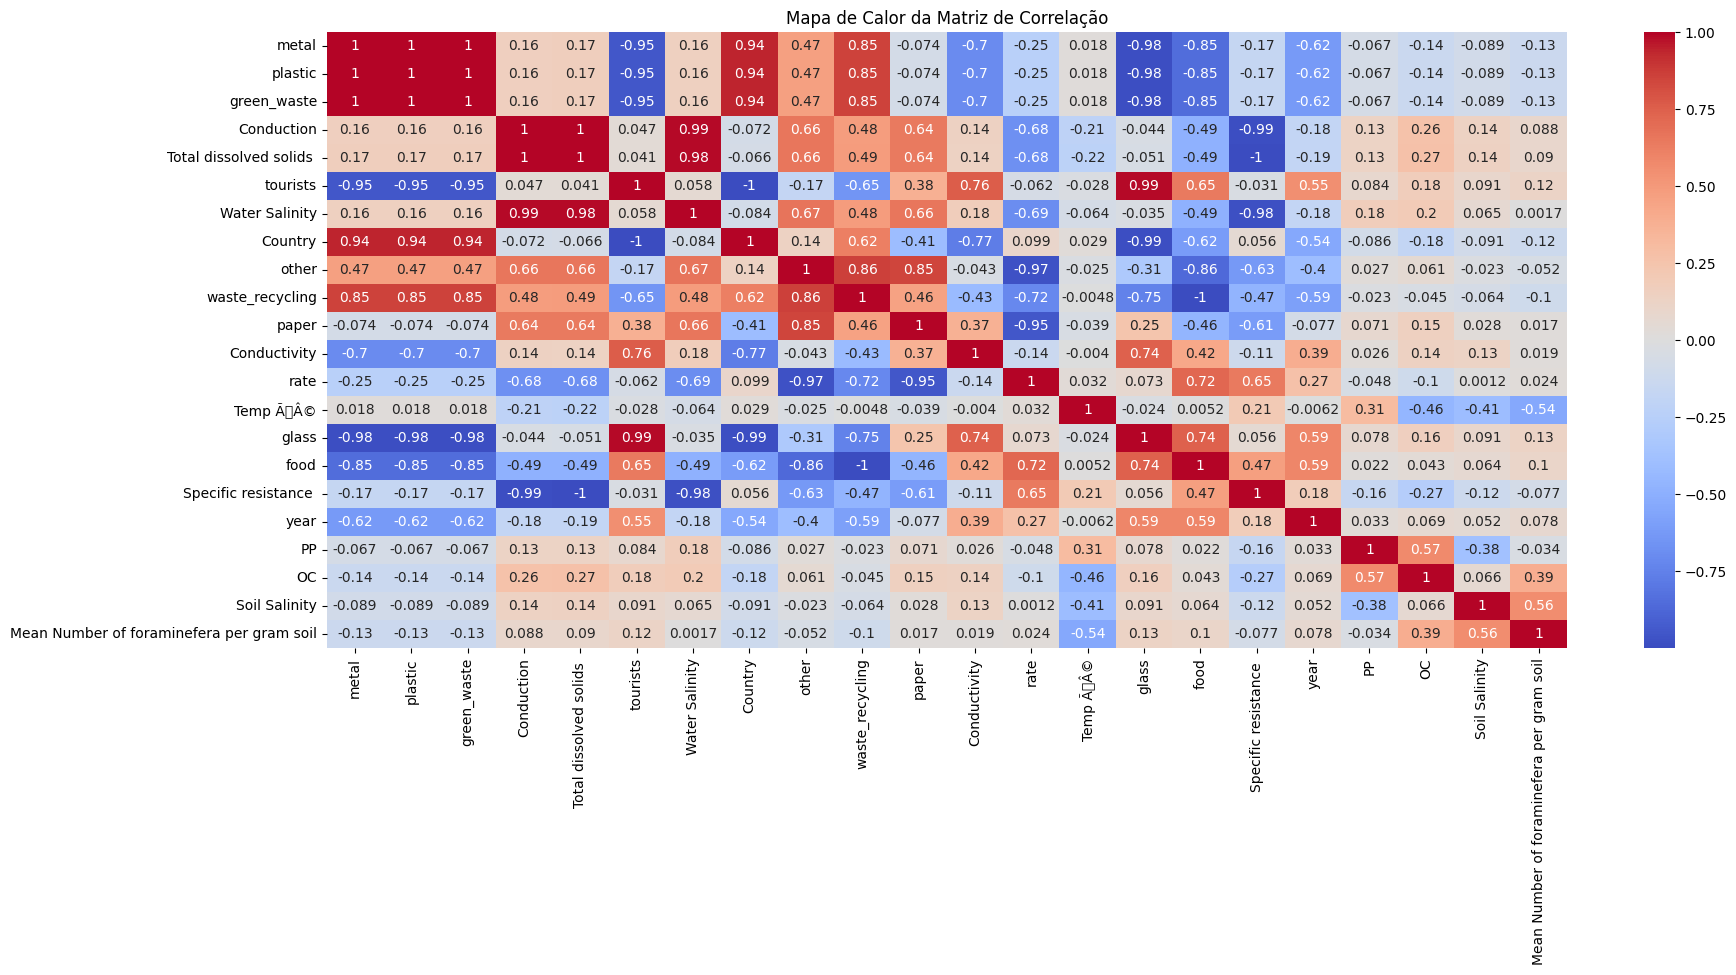

In [38]:
# Selecionar apenas as colunas desejadas
dados_selecionados = df[colunas_relacionadas]

# Calcular a matriz de correlação
correlacao = dados_selecionados.corr()

# Ajustar o tamanho da figura
plt.figure(figsize=(20, 8))

# Plotar o mapa de calor da matriz de correlação
sns.heatmap(correlacao, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor da Matriz de Correlação')
plt.show()

In [39]:
print(df.describe())

               Month         Season        Country  Pollution Level  \
count  139937.000000  139937.000000  139937.000000    139937.000000   
mean        6.570007       2.268199       1.751724         0.550369   
std         4.985497       1.018997       0.906657         0.692923   
min         1.000000       1.000000       1.000000         0.000000   
25%         3.000000       1.000000       1.000000         0.000000   
50%         5.000000       2.000000       1.000000         0.000000   
75%         9.000000       3.000000       3.000000         1.000000   
max        18.000000       4.000000       3.000000         2.000000   

       Sample number  Organic matter%  \
count  139937.000000    139937.000000   
mean        6.358769         0.487356   
std         3.796317         0.263471   
min         1.000000         0.121183   
25%         3.000000         0.293687   
50%         6.000000         0.414801   
75%         9.000000         0.671808   
max        14.000000         1.8

A partir das estatísticas descritivas fornecidas, podemos tirar várias conclusões sobre os dados analisados. :

### Geral
1. **Número de Amostras:**
   - Existem 139937 observações em todos os parâmetros.

### Variáveis Temporais e Locacionais
2. **Month (Mês):**
   - Média: 6.57 (aproximadamente junho).
   - Desvio padrão: 4.99, indicando uma distribuição relativamente uniforme ao longo do ano.
   - Variação de 1 a 18, sugerindo que a codificação do mês pode incluir algum erro ou meses de diferentes anos.

3. **Season (Estação):**
   - Média: 2.27, com 4 estações (1 a 4), provavelmente indicando Primavera (2).

4. **Country (País):**
   - Média: 1.75, com 3 países representados (1 a 3).

### Poluição e Qualidade do Solo
5. **Pollution Level (Nível de Poluição):**
   - Média: 0.55, com um desvio padrão de 0.69.
   - A maior parte dos dados (75%) tem um nível de poluição de 1 ou menos.

6. **Organic matter% (Matéria Orgânica %):**
   - Média: 0.49%, indicando uma quantidade moderada de matéria orgânica no solo.

7. **Nematode Species 1 per gram soil:**
   - Média: 6.03, mas com um desvio padrão alto (6.28), indicando variação significativa.

8. **Turbillaria per gram soil:**
   - Média muito baixa (0.15), indicando que esses organismos são raros no solo analisado.

9. **Foraminefera per gram soil:**
   - Média de 10.24, com uma alta variação (12.68).

10. **Nematode Species 2 per gram soil:**
    - Média: 4.47, também com alta variação (7.18).

### Propriedades Químicas da Água e do Solo
11. **Water pH e Soil pH:**
    - pH da água média: 8.20, ligeiramente alcalino.
    - pH do solo média: 8.24, também alcalino.

12. **OC (Carbono Orgânico):**
    - Média: 8.11, indicando uma quantidade moderada de carbono orgânico no solo.

13. **Water Salinity e Soil Salinity:**
    - Salinidade da água média: 38.32, indicando águas salinas.
    - Salinidade do solo média: 9.88, também relativamente alta.

### Parâmetros de Contaminação
14. **Conduction e Conductivity:**
    - Ambas com médias acima de 57000, sugerindo altos níveis de condução e condutividade no solo e na água.

15. **Total dissolved solids (Sólidos Totais Dissolvidos):**
    - Média alta: 57554.65, sugerindo um ambiente com muitos sólidos dissolvidos.

### Parâmetros de Resíduos
16. **Rate, Food, Glass, Metal, Other, Paper, Plastic:**
    - Dados como "food", "glass" e "metal" têm valores bastante específicos e consistentes.
    - Por exemplo, "food" tem uma média de 29.12 e "glass" de 7.29, enquanto "metal" tem uma média de 3.16, indicando a composição dos resíduos.

17. **Green Waste (Resíduos Verdes) e Waste Recycling (Reciclagem de Resíduos):**
    - Green Waste: Média muito baixa (0.86), sugerindo baixa quantidade de resíduos verdes.
    - Waste Recycling: Média de 23.21, com um desvio padrão relativamente baixo (3.23), indicando um nível consistente de reciclagem.

### Outros Parâmetros
18. **ORP (Potencial de Redox):**
    - Média negativa (-80.25), indicando condições redutoras.

19. **Temp (Temperatura):**
    - Média de 23.73°C, com uma ampla variação (de 14.7°C a 31.18°C).

### Conclusões Gerais
- **Estabilidade Ambiental:** A maioria dos parâmetros, como pH, salinidade e níveis de matéria orgânica, são estáveis, com algumas variações sazonais e geográficas.
- **Biodiversidade do Solo:** A biodiversidade do solo (nematoides, turbellaria e foraminíferos) mostra uma variação significativa, sugerindo diferentes condições ambientais.
- **Contaminação e Qualidade do Solo/Água:** Altos níveis de sólidos dissolvidos e salinidade indicam potencial contaminação ou características naturais de alta salinidade.
- **Gestão de Resíduos:** A reciclagem de resíduos parece ser uma prática comum, com quantidades moderadas de resíduos de papel, plástico e metais.


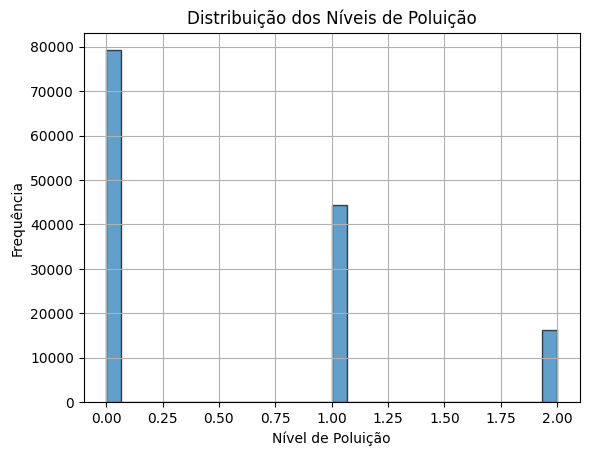

In [41]:
# Histograma dos níveis de poluição
plt.hist(df['Pollution Level'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribuição dos Níveis de Poluição')
plt.xlabel('Nível de Poluição')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Coluna "Pollution Level"

### Observações:
1. **Distribuição:**
   - A maioria dos valores estão concentrados entre 0 e 1, com 75% dos valores sendo 1 ou menores.
   - A mediana é 0, indicando que pelo menos metade dos dados tem um nível de poluição igual a 0.
   - O valor máximo é 2.

2. **Média e Desvio Padrão:**
   - A média é 0.55, o que sugere que a maioria dos valores de poluição estão abaixo de 1.
   - O desvio padrão é 0.69, indicando uma variação moderada nos níveis de poluição.

3. **Interpretação dos Níveis de Poluição:**
   - **0:** Sem poluição.
   - **1:** Nível moderado de poluição.
   - **2:** Alto nível de poluição.

# Primeira hipótese

Tendências Temporais: Podemos explorar se há padrões sazonais ou tendências ao longo do tempo em relação às coleta de lixo. Isso pode ser feito visualizando graficamente os dados ao longo dos meses.

In [40]:
# Exibir os valores únicos na coluna 'Month'
print(df['Month'].unique())


[ 8  9 11  1  3  5 18]


In [42]:
mes_mais_comum = df['Month'].mode()[0]

# Em seguida, substituímos os valores 18 pelo mês mais comum
df['Month'] = df['Month'].replace(18, mes_mais_comum)

In [43]:
# Exibir os valores únicos na coluna 'Month'
print(df['Month'].unique())


[ 8  9 11  1  3  5]


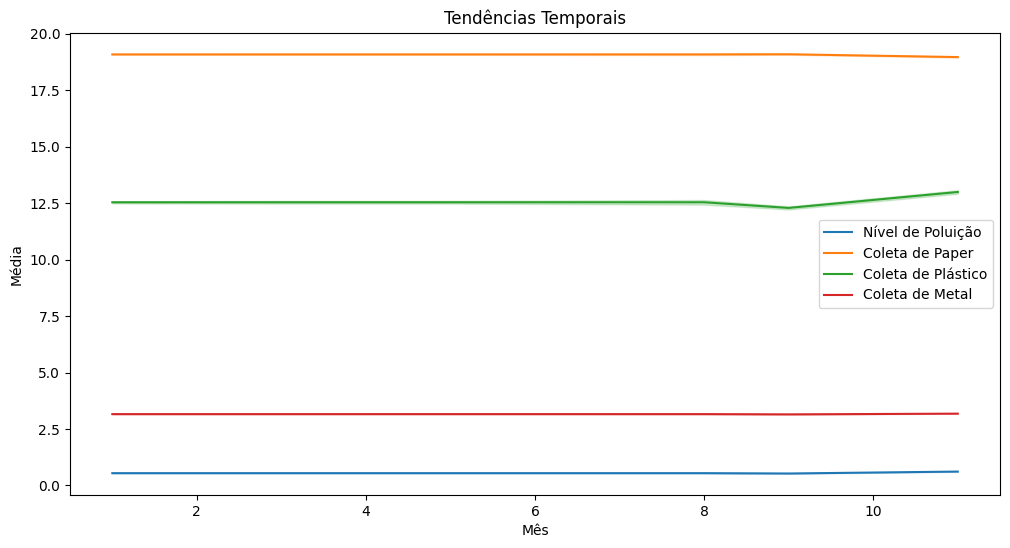

In [44]:
# Plote os dados
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Month', y='Pollution Level', label='Nível de Poluição')
sns.lineplot(data=df, x='Month', y='paper', label='Coleta de Paper')
sns.lineplot(data=df, x='Month', y='plastic', label='Coleta de Plástico')
sns.lineplot(data=df, x='Month', y='metal', label='Coleta de Metal')
# Adicione outras linhas para cada tipo de material que você tem no seu conjunto de dados
plt.title('Tendências Temporais')
plt.xlabel('Mês')
plt.ylabel('Média')
plt.legend()
plt.show()

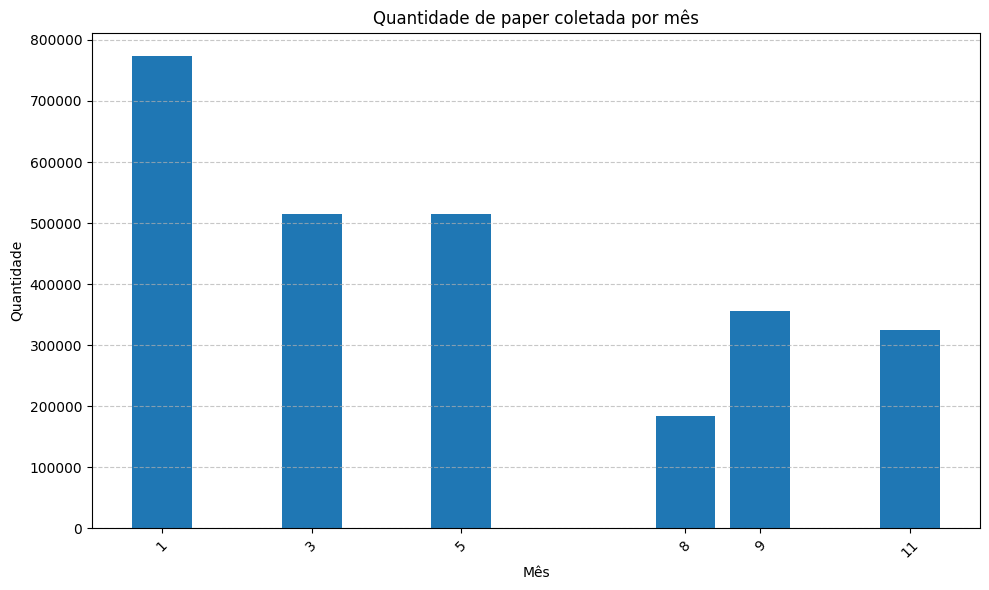

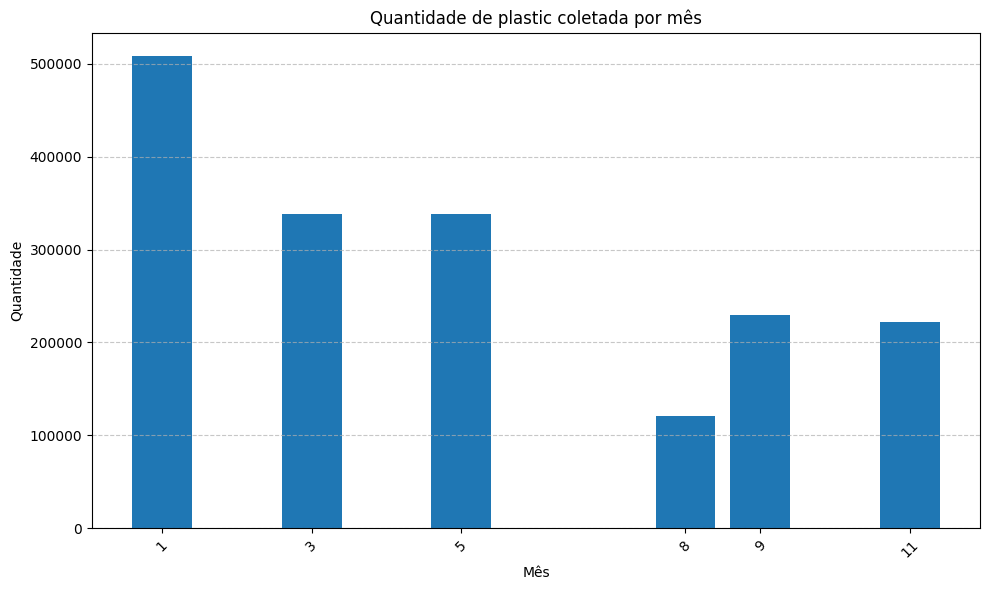

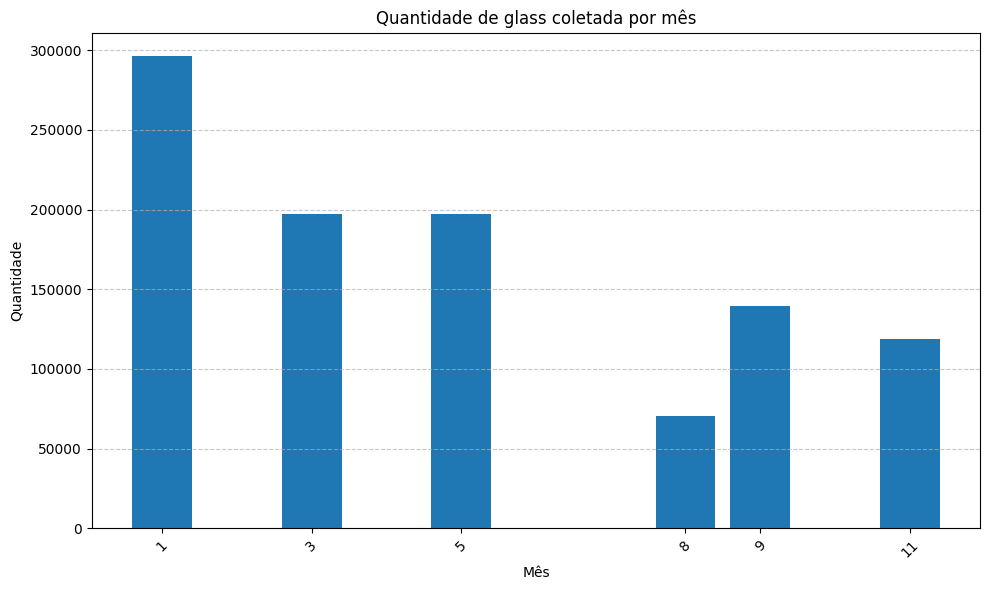

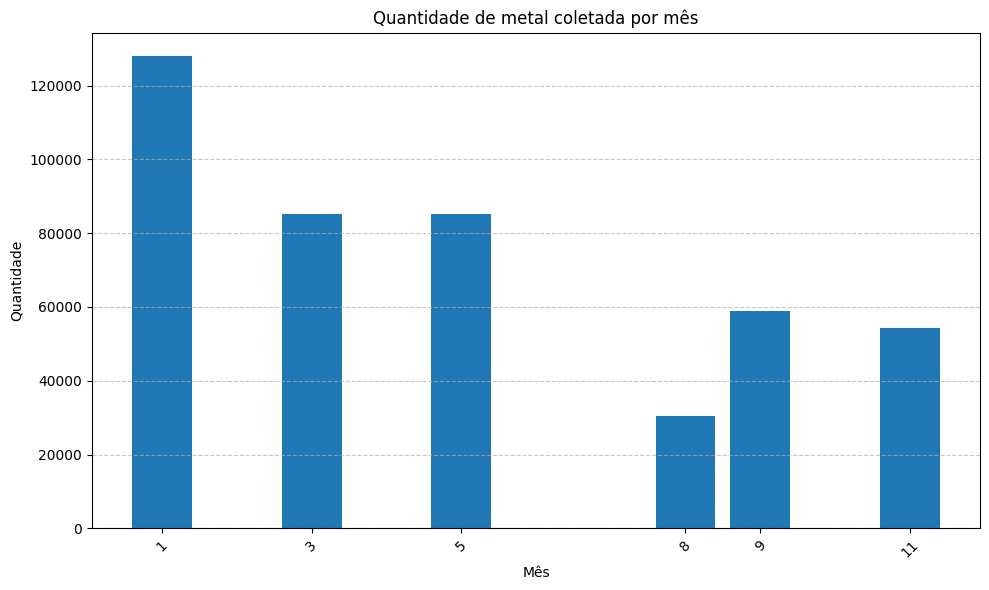

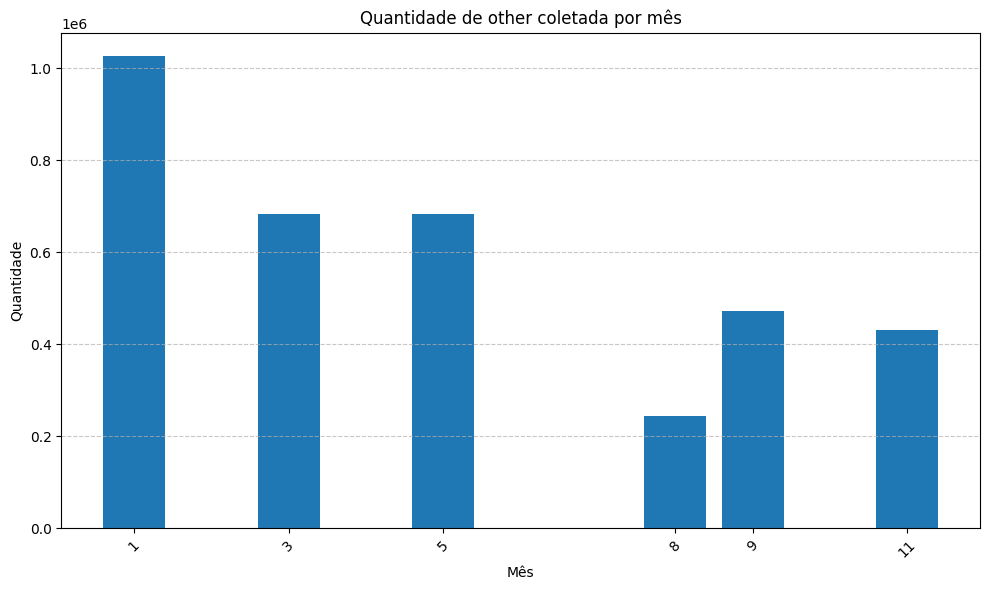

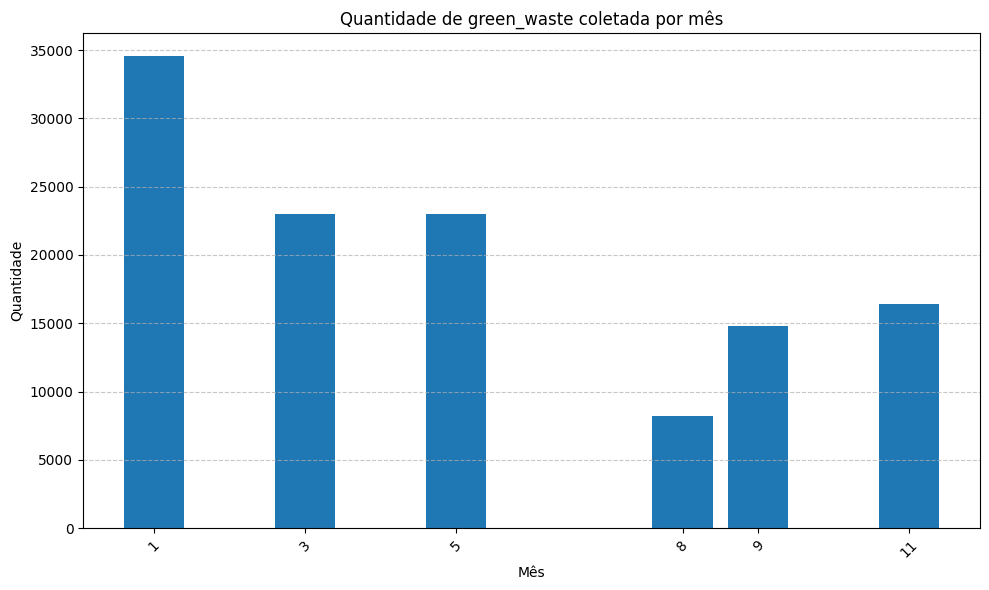

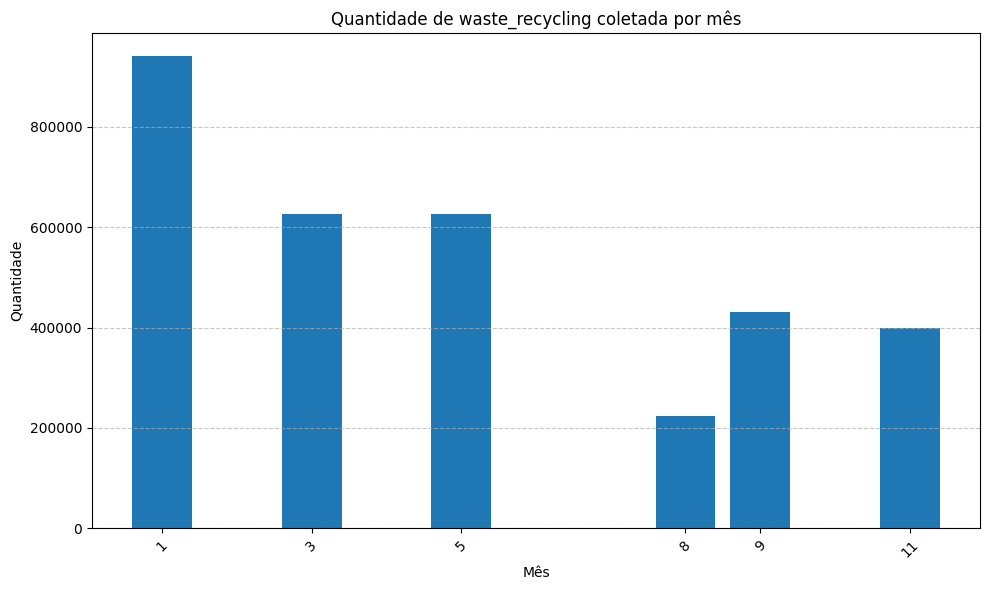

In [45]:
# Selecionando apenas as colunas relevantes para análise
colunas_lixo = ['Month', 'paper', 'plastic', 'glass', 'metal', 'other', 'green_waste', 'waste_recycling']
dados_lixo = df[colunas_lixo]

# Agrupando os dados por mês e somando as quantidades de cada tipo de lixo
total_por_mes = dados_lixo.groupby('Month').sum()

# Plotando gráficos de barras para cada tipo de lixo
for coluna in total_por_mes.columns:
    plt.figure(figsize=(10, 6))
    plt.bar(total_por_mes.index, total_por_mes[coluna])
    plt.title(f"Quantidade de {coluna} coletada por mês")
    plt.xlabel("Mês")
    plt.ylabel("Quantidade")
    plt.xticks(total_por_mes.index, rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()



In [46]:
# Selecionando apenas as colunas relevantes para análise
colunas_lixo = ['Month', 'paper', 'plastic', 'glass', 'metal', 'other', 'green_waste', 'waste_recycling']
dados_lixo = df[colunas_lixo]

# Iterar sobre cada coluna e imprimir os valores de cada tipo de lixo coletado por mês
for coluna in colunas_lixo[1:]:  # Ignorando a coluna 'Month' na iteração
    print(f"Tipo de lixo: {coluna}")
    for mes in dados_lixo['Month'].unique():
        quantidade = dados_lixo.loc[dados_lixo['Month'] == mes, coluna].sum()
        print(f"Mês {mes}: {quantidade} unidades")
    print("\n")

Tipo de lixo: paper
Mês 8: 184050.5 unidades
Mês 9: 356590.89999999997 unidades
Mês 11: 324101.0 unidades
Mês 1: 773012.1 unidades
Mês 3: 515341.4 unidades
Mês 5: 515341.4 unidades


Tipo de lixo: plastic
Mês 8: 120908.99999999999 unidades
Mês 9: 229516.19999999998 unidades
Mês 11: 222018.0 unidades
Mês 1: 507817.79999999993 unidades
Mês 3: 338545.19999999995 unidades
Mês 5: 338545.19999999995 unidades


Tipo de lixo: glass
Mês 8: 70499.0 unidades
Mês 9: 139658.19999999998 unidades
Mês 11: 118997.99999999999 unidades
Mês 1: 296095.8 unidades
Mês 3: 197397.2 unidades
Mês 5: 197397.2 unidades


Tipo de lixo: metal
Mês 8: 30457.5 unidades
Mês 9: 58783.5 unidades
Mês 11: 54315.0 unidades
Mês 1: 127921.5 unidades
Mês 3: 85281.0 unidades
Mês 5: 85281.0 unidades


Tipo de lixo: other
Mês 8: 244269.0 unidades
Mês 9: 471364.19999999995 unidades
Mês 11: 431337.99999999994 unidades
Mês 1: 1025929.7999999999 unidades
Mês 3: 683953.2 unidades
Mês 5: 683953.2 unidades


Tipo de lixo: green_waste
Mês

In [47]:
# Calcular os meses com maiores e menores quantidades de lixo coletado para cada tipo de lixo
for coluna in dados_lixo.columns[1:]:  # Ignorando a coluna 'Month' na iteração
    print(f"Tipo de lixo: {coluna}")
    mes_max = dados_lixo.groupby('Month')[coluna].sum().idxmax()
    mes_min = dados_lixo.groupby('Month')[coluna].sum().idxmin()
    print(f"Mês com maior quantidade coletada: {mes_max}")
    print(f"Mês com menor quantidade coletada: {mes_min}\n")


Tipo de lixo: paper
Mês com maior quantidade coletada: 1
Mês com menor quantidade coletada: 8

Tipo de lixo: plastic
Mês com maior quantidade coletada: 1
Mês com menor quantidade coletada: 8

Tipo de lixo: glass
Mês com maior quantidade coletada: 1
Mês com menor quantidade coletada: 8

Tipo de lixo: metal
Mês com maior quantidade coletada: 1
Mês com menor quantidade coletada: 8

Tipo de lixo: other
Mês com maior quantidade coletada: 1
Mês com menor quantidade coletada: 8

Tipo de lixo: green_waste
Mês com maior quantidade coletada: 1
Mês com menor quantidade coletada: 8

Tipo de lixo: waste_recycling
Mês com maior quantidade coletada: 1
Mês com menor quantidade coletada: 8



#Tendências Temporais

 Com base nos dados fornecidos sobre a quantidade de diferentes tipos de lixo coletados por mês e nas análises das maiores e menores quantidades coletadas para cada tipo de lixo, podemos tirar algumas conclusões e formular algumas hipóteses:

1. **Padrões Sazonais:**
   - Para a maioria dos tipos de lixo, os meses de janeiro (Mês 1) apresentam consistentemente as maiores quantidades coletadas. Isso pode estar relacionado ao início do ano, quando as atividades industriais e de consumo muitas vezes aumentam após as festas de fim de ano.
   - Por outro lado, os meses de agosto (Mês 8) tendem a ter as menores quantidades coletadas para a maioria dos tipos de lixo. Isso pode refletir uma diminuição nas atividades industriais e de consumo durante os meses de verão em algumas regiões.

2. **Reciclagem e Conscientização Ambiental:**
   - A quantidade de resíduos reciclados (waste_recycling) parece seguir um padrão semelhante aos outros tipos de lixo, com maiores quantidades coletadas em janeiro e menores em agosto. Isso sugere que os esforços de reciclagem podem ser influenciados por fatores sazonais semelhantes aos que afetam a produção de resíduos em geral.

3. **Possíveis Fatores Contribuintes:**
   - Os picos de coleta de resíduos em janeiro podem estar relacionados a várias atividades, como limpeza pós-festas, renovações de ano novo, retorno ao trabalho após as férias e aumento das compras devido a vendas de pós-natal.
   - Os menores volumes de coleta em agosto podem ser atribuídos a férias de verão, redução da atividade industrial e menor consumo em algumas áreas devido às férias de verão.

4. **Impacto da Estação do Ano:**
   - É possível que as variações na quantidade de resíduos coletados ao longo do ano também estejam relacionadas às condições climáticas e à sazonalidade de certas atividades, como jardinagem e construção.


# Segunda hipótese

Como as diferentes variáveis ambientais, como pH da água, salinidade, temperatura, entre outras, estão correlacionadas com os níveis de poluição. Isso nos ajudará a entender quais fatores ambientais estão mais fortemente associados à poluição da água.

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


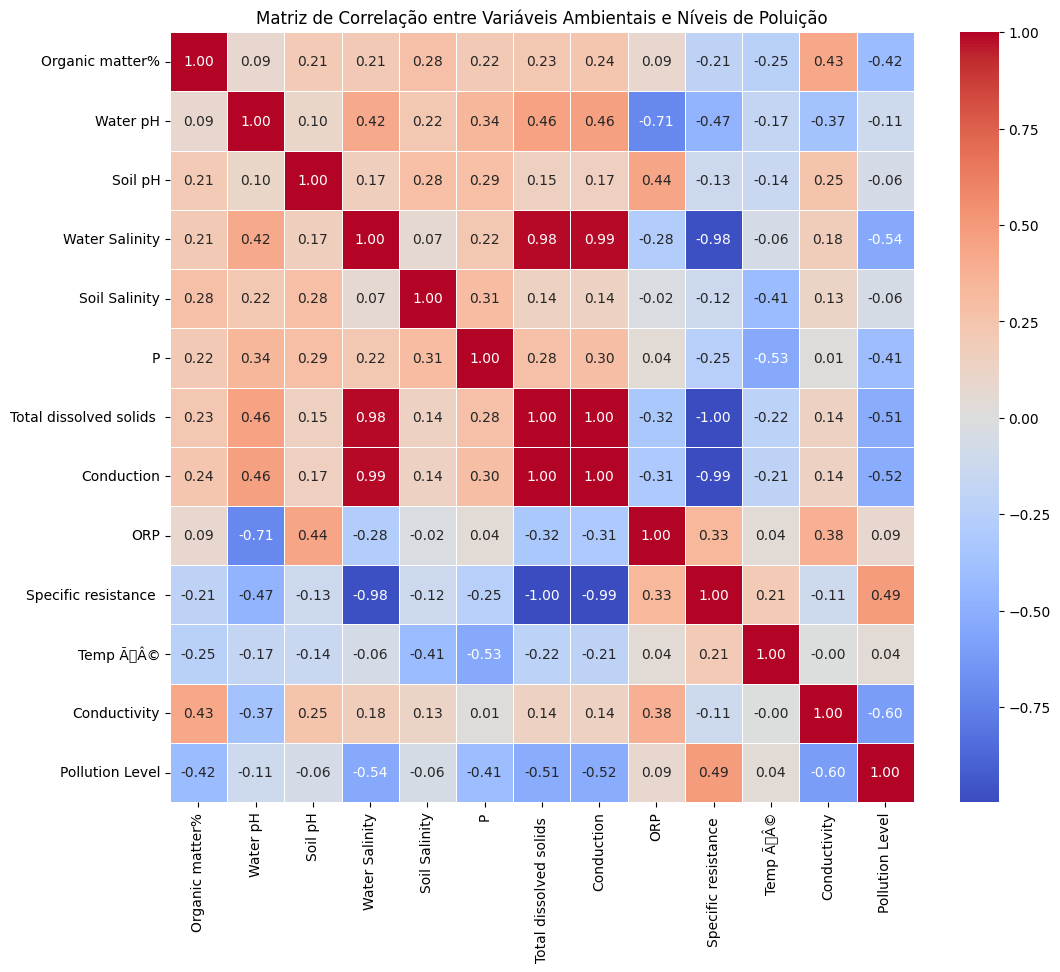

In [48]:
# Selecionar as variáveis de interesse
variaveis_ambientais = ['Organic matter%', 'Water pH', 'Soil pH', 'Water Salinity',
                       'Soil Salinity', 'P', 'Total dissolved solids ', 'Conduction',
                       'ORP', 'Specific resistance ', 'Temp Ã\x82Â©', 'Conductivity']

# Adicionar a variável de poluição
variaveis_analise = variaveis_ambientais + ['Pollution Level']

# Criar um DataFrame com as variáveis selecionadas
df_analise = df[variaveis_analise]

# Calcular a matriz de correlação
correlation_matrix = df_analise.corr()

# Plotar um mapa de calor da matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação entre Variáveis Ambientais e Níveis de Poluição')
plt.show()

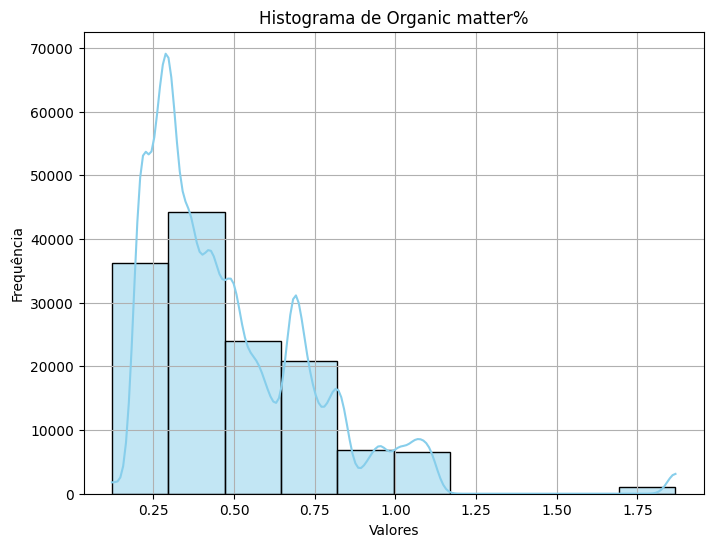

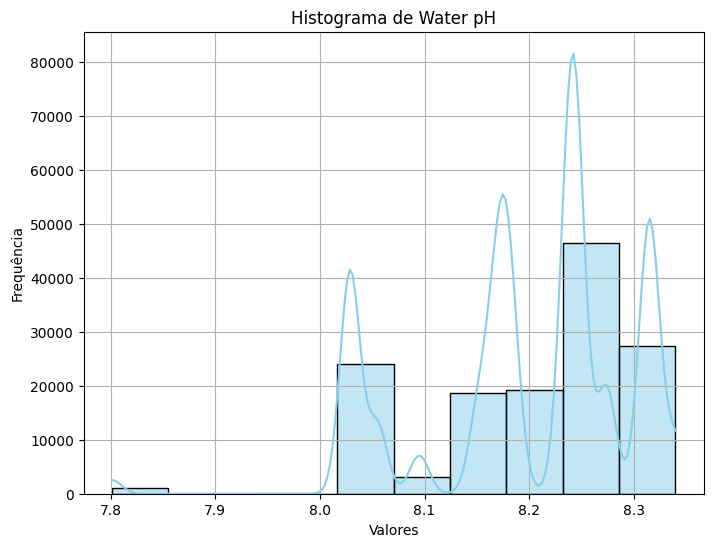

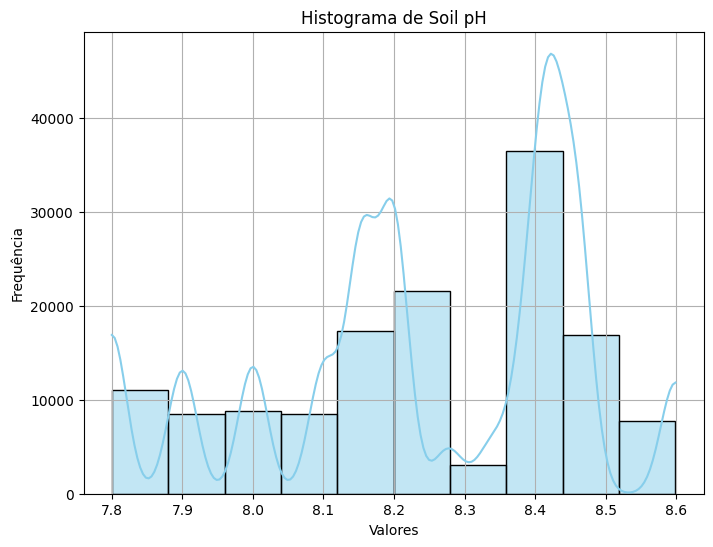

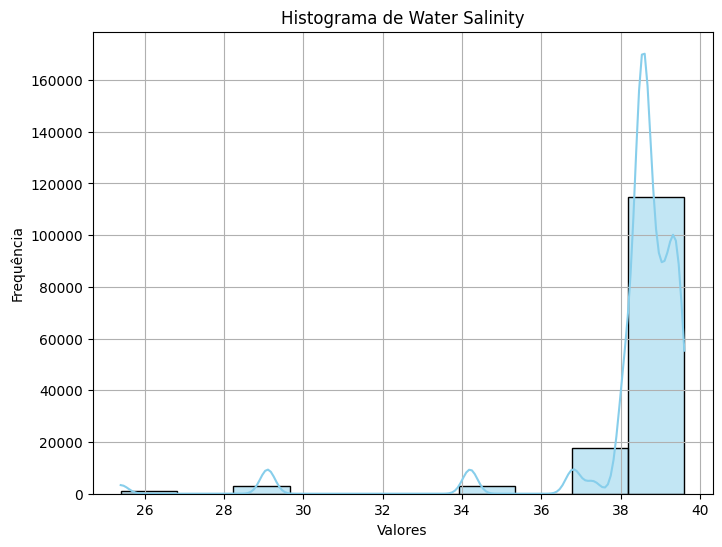

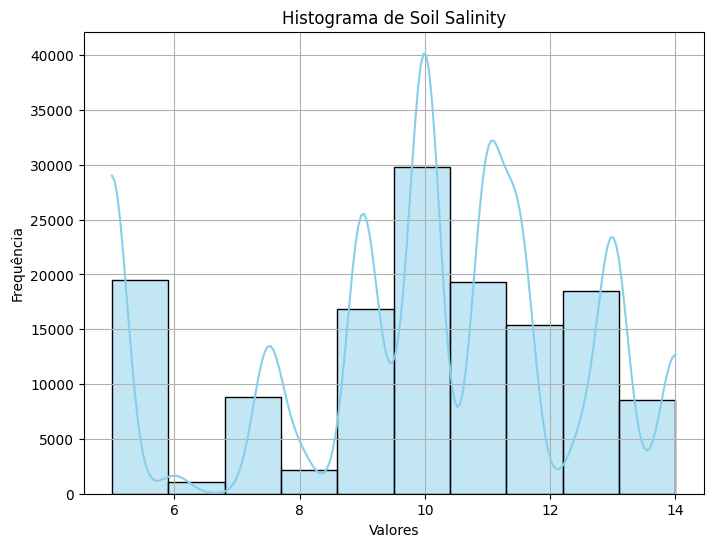

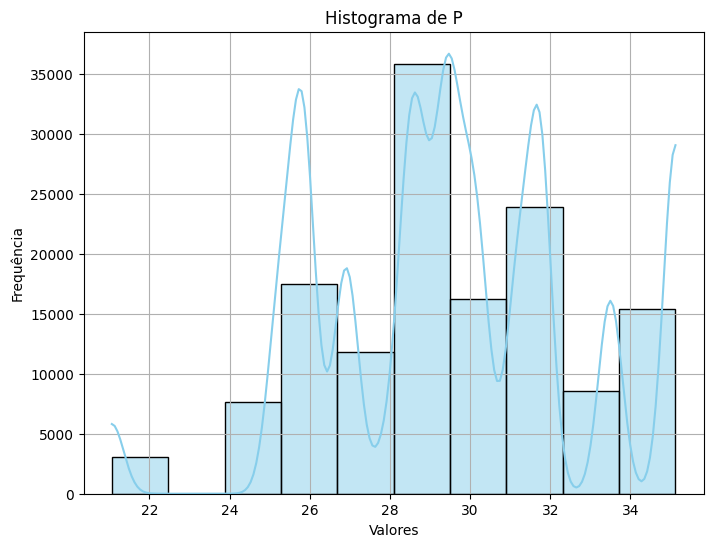

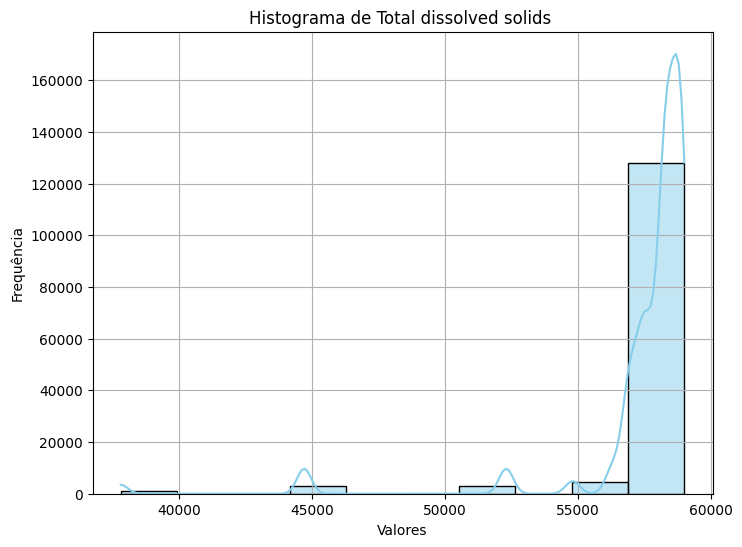

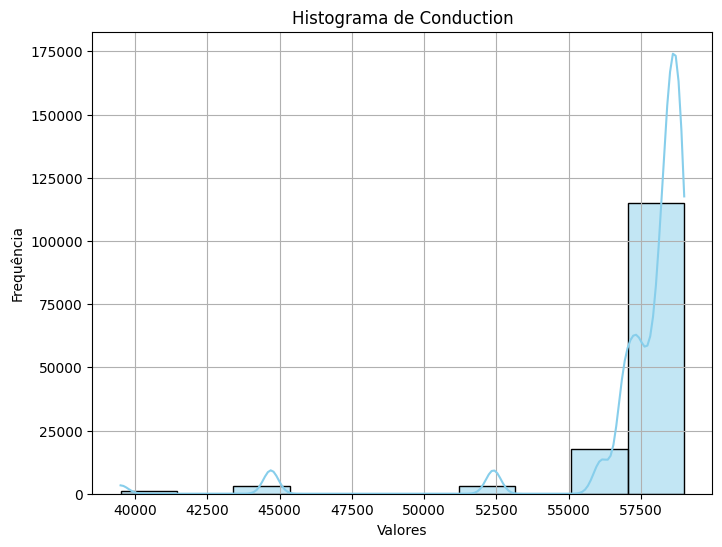

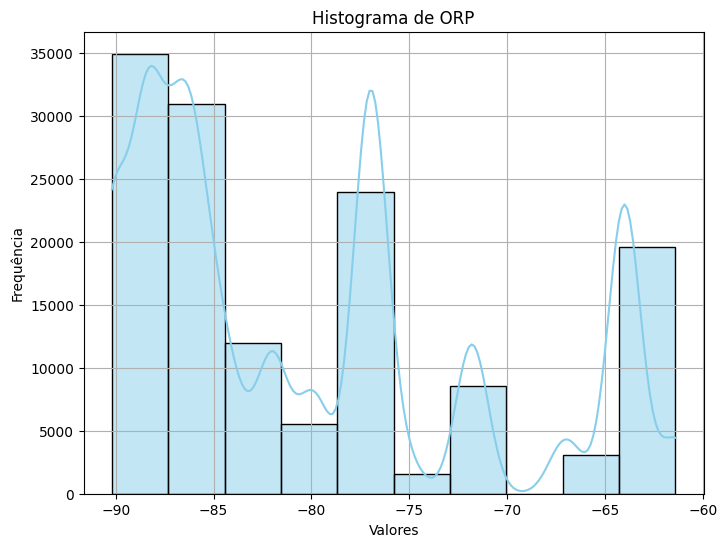

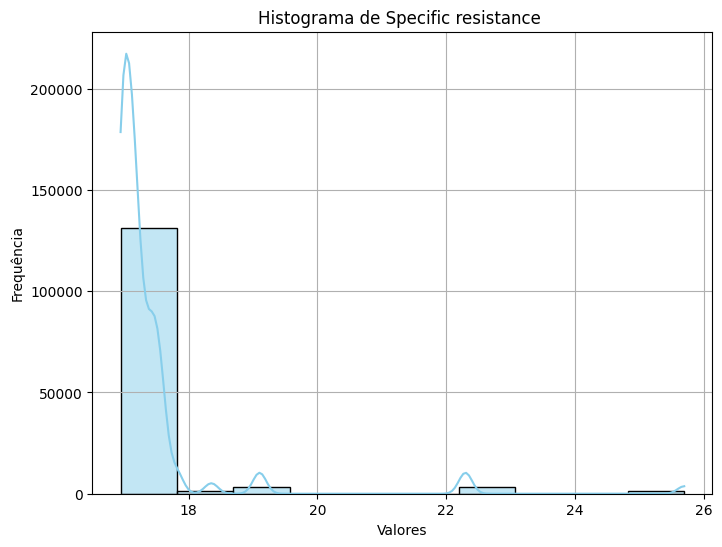

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


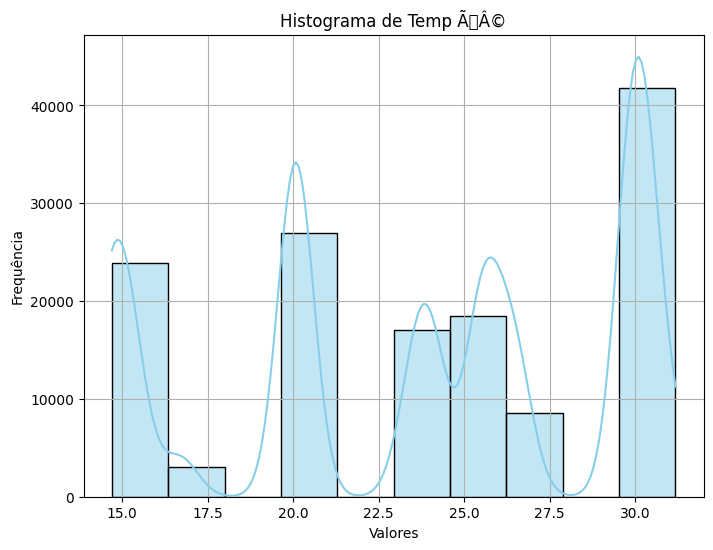

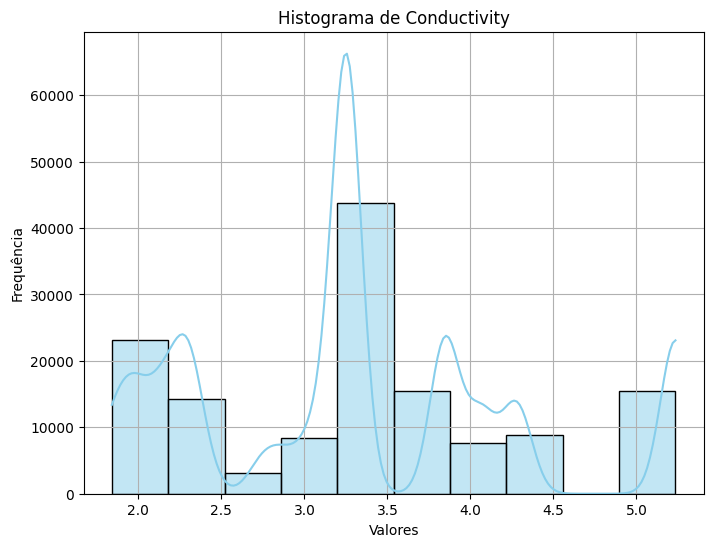

In [49]:
# Gerar histogramas para cada variável
for coluna in variaveis_ambientais:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[coluna], kde=True, bins=10, color='skyblue')
    plt.title(f'Histograma de {coluna}')
    plt.xlabel('Valores')
    plt.ylabel('Frequência')
    plt.grid(True)
    plt.show()

# Análise do gráfico acima
1. **Ácido-Base (pH)**:
   - O pH da água (Water pH) tem uma correlação negativa moderada com o nível de poluição (-0.107), o que sugere uma tendência de diminuição no nível de poluição com o aumento do pH da água.
   - O pH do solo (Soil pH) apresenta uma correlação muito fraca com o nível de poluição (-0.062).

2. **Salinidade**:
   - Tanto a salinidade da água (Water Salinity) quanto a salinidade do solo (Soil Salinity) exibem correlações negativas significativas com o nível de poluição (-0.535 e -0.058, respectivamente), indicando uma possível redução nos níveis de poluição em ambientes mais salinos.

3. **Temperatura e Condutividade**:
   - A temperatura (Temp ÃÂ©) e a condutividade (Conductivity) mostram correlações fracas com o nível de poluição (0.041 e -0.598, respectivamente).
   - A temperatura parece ter uma correlação positiva leve com o nível de poluição, enquanto a condutividade apresenta uma correlação negativa moderada, sugerindo uma redução nos níveis de poluição com o aumento da condutividade.

4. **Sólidos Dissolvidos Totais (TDS)**:
   - Os sólidos dissolvidos totais (Total dissolved solids) têm uma correlação negativa moderada com o nível de poluição (-0.514), indicando uma tendência de redução nos níveis de poluição com o aumento dos sólidos dissolvidos.

Relação entre a coleta de lixo e o nível de poluição:

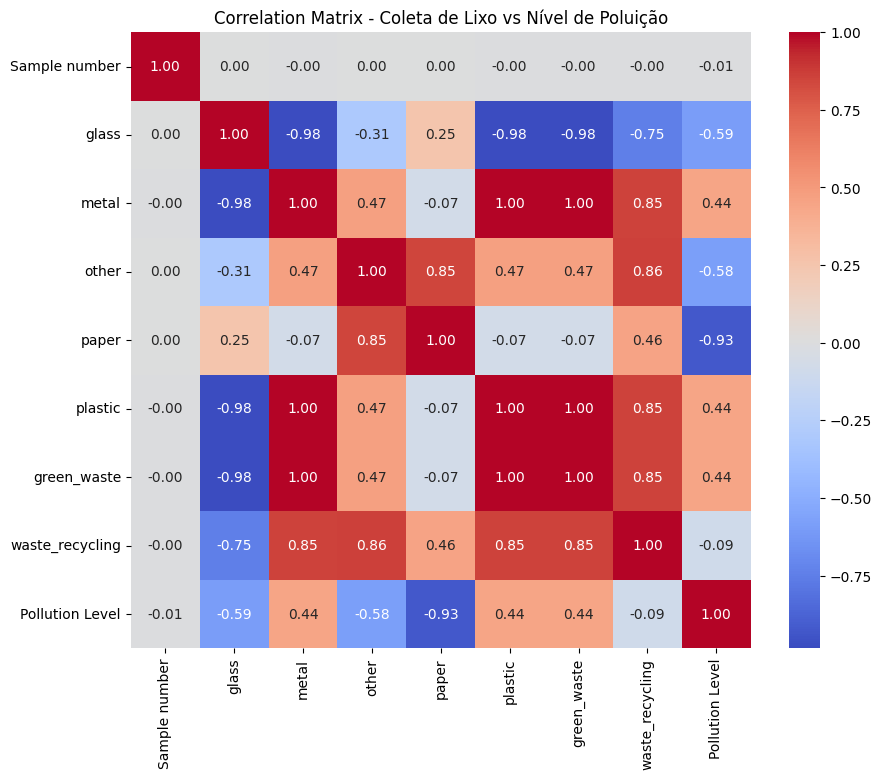

In [50]:
# Selecionando as colunas relevantes
cols_coleta_lixo = ['Sample number', 'glass', 'metal', 'other', 'paper', 'plastic', 'green_waste', 'waste_recycling', 'Pollution Level']
df_coleta_lixo = df[cols_coleta_lixo]

# Calculando a matriz de correlação
correlation_matrix = df_coleta_lixo.corr()

# Visualizando a matriz de correlação como um mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - Coleta de Lixo vs Nível de Poluição')
plt.show()

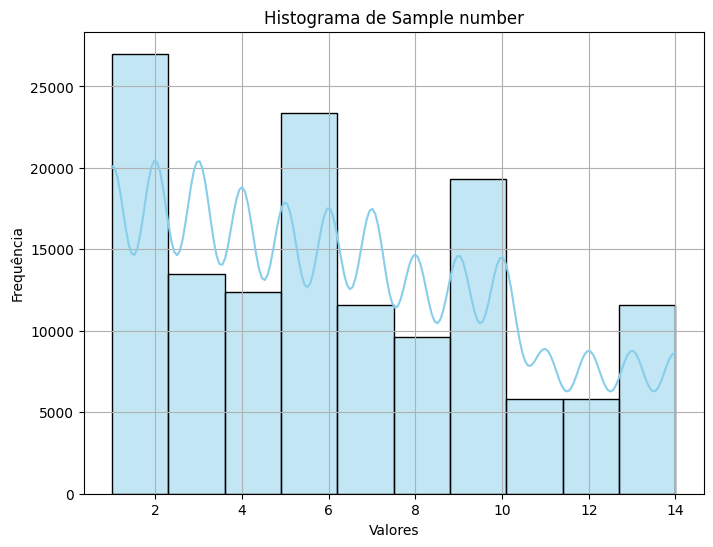

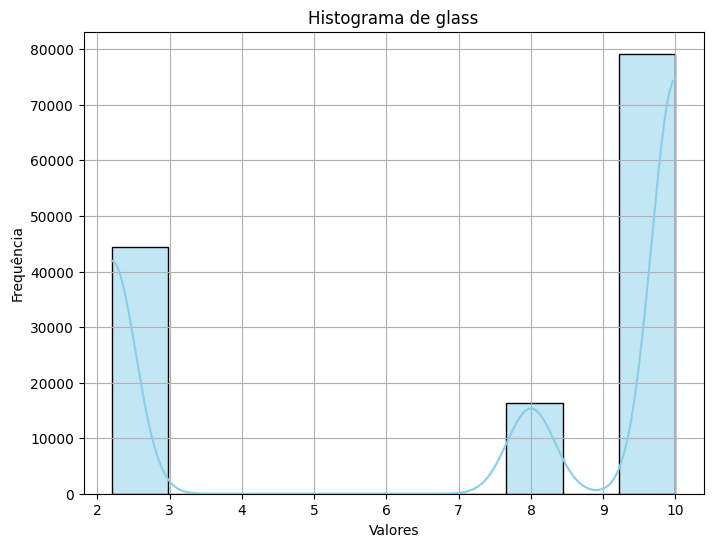

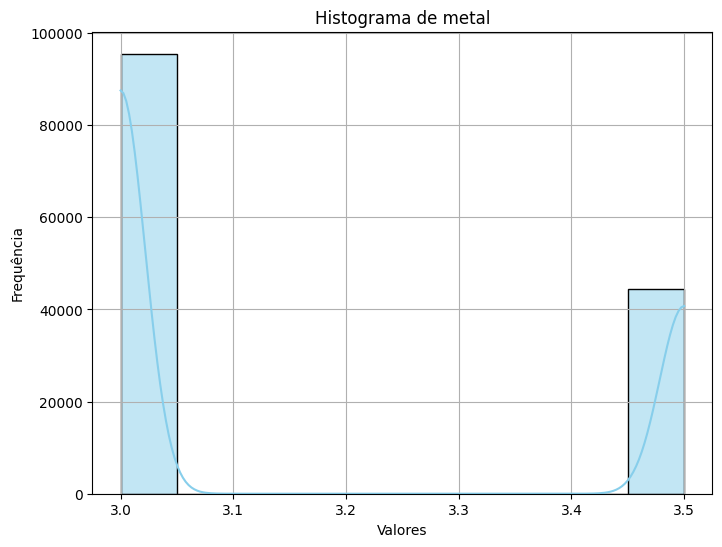

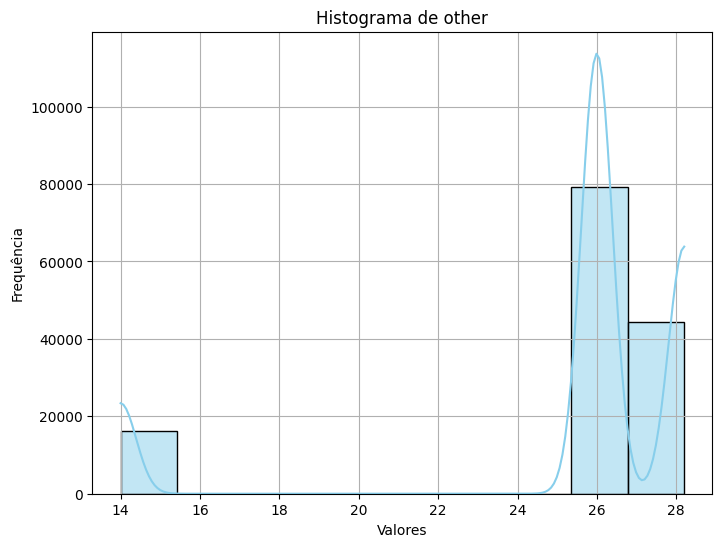

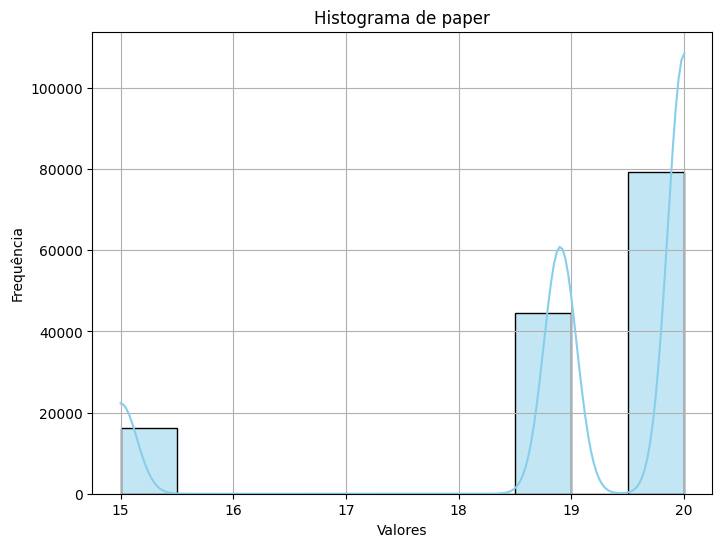

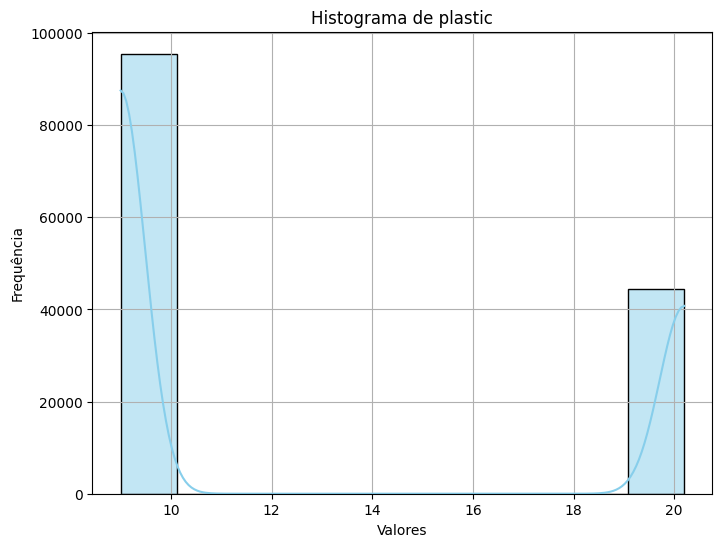

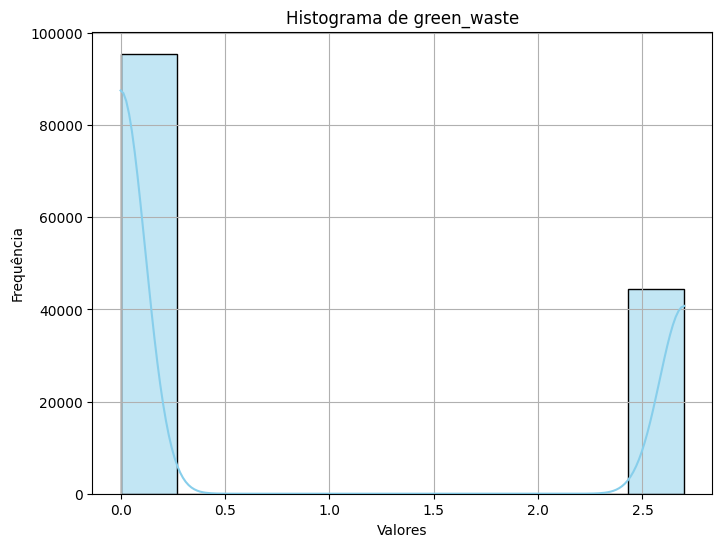

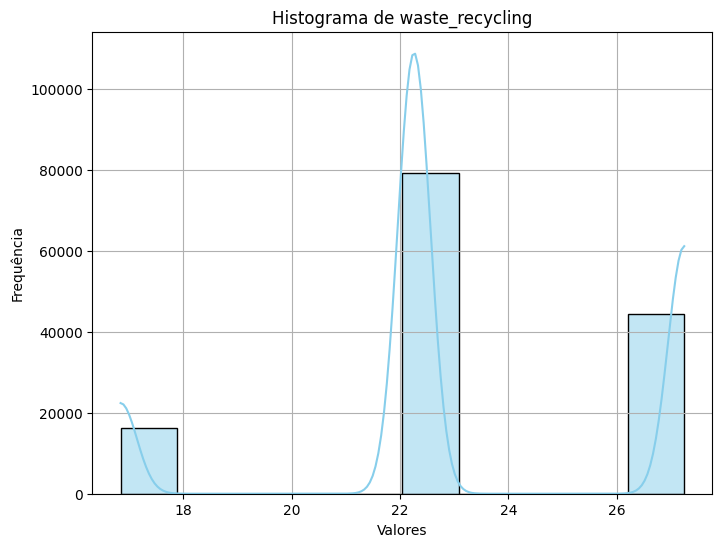

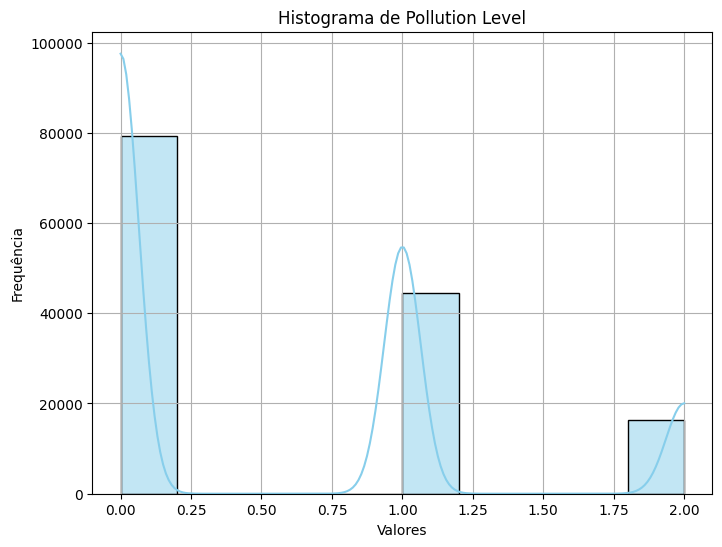

In [51]:
# Gerar histogramas para cada variável
for coluna in cols_coleta_lixo:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[coluna], kde=True, bins=10, color='skyblue')
    plt.title(f'Histograma de {coluna}')
    plt.xlabel('Valores')
    plt.ylabel('Frequência')
    plt.grid(True)
    plt.show()

Analisando a matriz de correlação, podemos observar o seguinte:

1. **Correlações Positivas Fortes:**
   - Há uma forte correlação positiva entre os tipos de resíduos "metal", "plástico", "green_waste" e "waste_recycling". Isso sugere que esses tipos de resíduos são frequentemente coletados juntos ou em locais semelhantes.
   - Também há uma forte correlação positiva entre "other" e "paper", o que indica que esses tipos de resíduos também estão frequentemente coletados juntos.

2. **Correlações Negativas:**
   - Existe uma correlação negativa significativa entre "glass" e os tipos de resíduos "metal", "plástico", "green_waste" e "waste_recycling". Isso pode sugerir que esses tipos de resíduos são coletados em áreas diferentes ou em momentos diferentes em comparação com o vidro.

3. **Correlações Fracas:**
   - A maioria das correlações com "Sample number" e "Pollution Level" parece ser fraca, o que sugere que o número de amostras coletadas e os diferentes tipos de resíduos têm uma influência mediana nos níveis de poluição.



# Análise da relação do número de turistas e o número de lixo encontrado naquela área



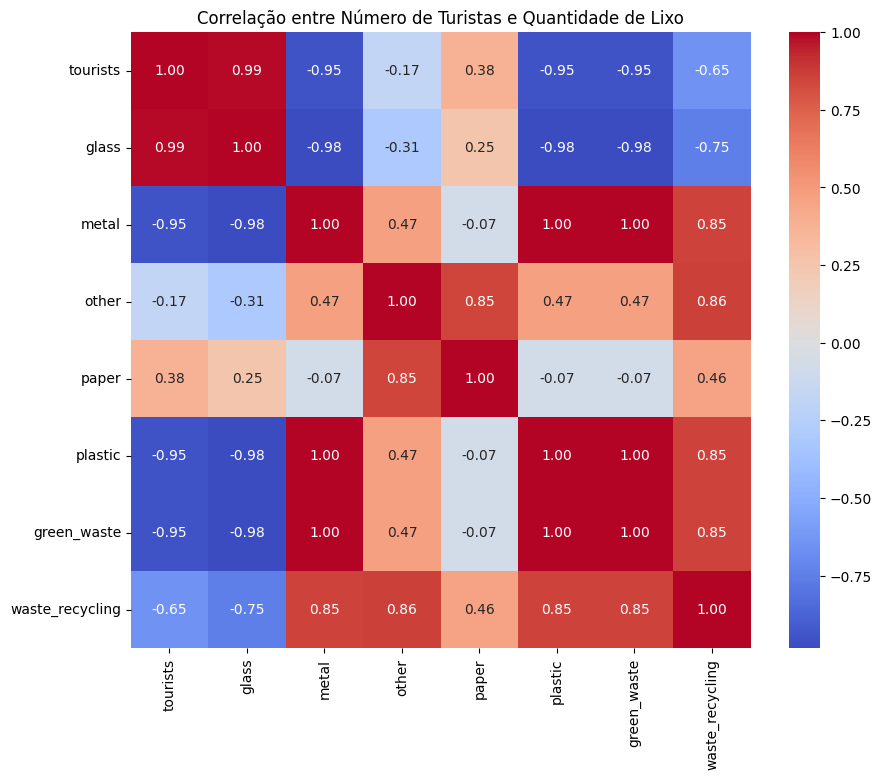

In [ ]:
# Calcular a correlação entre o número de turistas e a quantidade de diferentes tipos de lixo
correlacao = df[['tourists', 'glass', 'metal', 'other', 'paper', 'plastic', 'green_waste', 'waste_recycling']].corr()

# Visualizar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre Número de Turistas e Quantidade de Lixo')
plt.show()

1. **Correlação positiva com turistas e resíduos diversos:** A forte correlação positiva entre o número de turistas e diferentes tipos de resíduos, como vidro, plástico, resíduos orgânicos e reciclagem de resíduos, sugere que áreas com maior afluxo de turistas tendem a produzir mais resíduos em geral.

2. **Correlação negativa com turistas e metal:** A correlação negativa entre o número de turistas e resíduos metálicos pode indicar que áreas com maior atividade turística possuem menos resíduos desse tipo. Isso pode ser resultado de práticas de gestão de resíduos mais eficientes ou de preferências de consumo dos turistas.

3. **Possível relação com o perfil dos turistas:** A análise da relação entre o número de turistas e a composição dos resíduos pode fornecer insights sobre o perfil dos turistas que visitam determinada área. Por exemplo, uma maior presença de turistas pode estar associada a um aumento na produção de resíduos plásticos, sugerindo um padrão de consumo específico.

4. **Impacto na gestão de resíduos:** A forte correlação entre o número de turistas e a quantidade total de resíduos pode destacar a necessidade de estratégias eficazes de gestão de resíduos em destinos turísticos. Isso inclui não apenas a coleta adequada de resíduos, mas também iniciativas de reciclagem e conscientização ambiental.

5. **Potencial para políticas de sustentabilidade:** A análise da relação entre o número de turistas e a quantidade de resíduos pode ajudar na formulação de políticas de sustentabilidade em áreas turísticas. Isso pode envolver a implementação de medidas para reduzir o uso de materiais descartáveis ​​ou incentivar práticas de consumo mais sustentáveis entre os turistas.

Esses pontos destacam a importância de entender como o turismo pode influenciar a geração e o gerenciamento de resíduos em diferentes áreas, visando promover práticas mais sustentáveis ​​e preservar o meio ambiente.


In [52]:
# Somar a quantidade de cada tipo de resíduo para obter a quantidade total de resíduos
df['Quantidade total de resíduos'] = df[['glass', 'metal', 'other', 'paper', 'plastic', 'leather', 'green_waste', 'waste_recycling']].sum(axis=1)

# Calcular a taxa de geração de resíduos por turista
df['Taxa de geração de resíduos por turista'] = df['Quantidade total de resíduos'] / df['tourists']


In [53]:
df.head()

,Month,Season,Country,Pollution Level,Sample number,Organic matter%,Mean Number of Nematode species 1 per gram soil,Mean Number of Turbillaria per gram soil,Mean Number of foraminefera per gram soil,Mean Number of Nematode species 2 per gram soil,Water pH,Soil pH,OC,Water Salinity,Soil Salinity,P,Total dissolved solids,PP,Conduction,ORP,Specific resistance,Temp ÃÂ©,Conductivity,Unnamed: 0,code,year,period,id,tourists,venue,rate,food,glass,metal,other,paper,plastic,leather,green_waste,waste_recycling,Quantidade total de resíduos,Taxa de geração de resíduos por turista
0,8,4,1,0,1,0.210246,5.7,0.155556,0.0,0.0,8.055,8.0,7.3,38.5,11.0,28.396893,57500.0,196.3,57400.0,-79.9,17.42,30.12,3.2523,10,CAS_7723-14-0,2009,2009-01--2009-12,FRGR0220,71176346.0,0.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,90.26,0.000001
1,8,4,1,0,1,0.210246,5.7,0.155556,0.0,0.0,8.055,8.0,7.3,38.5,11.0,28.396893,57500.0,196.3,57400.0,-79.9,17.42,30.12,3.2523,17,CAS_14265-44-2,2009,2009-01--2009-12,FRGR1496,71176346.0,4.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,90.26,0.000001
2,8,4,1,0,1,0.210246,5.7,0.155556,0.0,0.0,8.055,8.0,7.3,38.5,11.0,28.396893,57500.0,196.3,57400.0,-79.9,17.42,30.12,3.2523,24,CAS_7723-14-0,2009,2009-01--2009-12,FRDR174,71176346.0,0.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,90.26,0.000001
3,8,4,1,0,1,0.210246,5.7,0.155556,0.0,0.0,8.055,8.0,7.3,38.5,11.0,28.396893,57500.0,196.3,57400.0,-79.9,17.42,30.12,3.2523,34,CAS_7723-14-0,2009,2009-01--2009-12,FRGR1022,71176346.0,0.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,90.26,0.000001
4,8,4,1,0,1,0.210246,5.7,0.155556,0.0,0.0,8.055,8.0,7.3,38.5,11.0,28.396893,57500.0,196.3,57400.0,-79.9,17.42,30.12,3.2523,43,CAS_7723-14-0,2009,2009-01--2009-12,FRGR0175,71176346.0,0.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,90.26,0.000001


#Modelo de Machine Learning

---

Interpretação dos Níveis de Poluição:

- 0: Sem poluição.
- 1: Nível moderado de poluição.
- 2: Alto nível de poluição.

In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Definindo as features (X) e o target (y)
X = df[['Organic matter%', 'Mean Number of Nematode species 1 per gram soil', 'Mean Number of Turbillaria per gram soil',
        'Mean Number of foraminefera per gram soil', 'Mean Number of Nematode species 2 per gram soil', 'Water pH',
        'Soil pH', 'OC', 'Water Salinity', 'Soil Salinity', 'P', 'Total dissolved solids ', 'PP', 'Conduction',
        'ORP', 'Specific resistance ', 'Temp Ã\x82Â©', 'Conductivity', 'tourists', 'rate', 'food', 'glass', 'metal',
        'other', 'paper', 'plastic', 'leather', 'green_waste', 'waste_recycling','Quantidade total de resíduos', 'Taxa de geração de resíduos por turista']]

y = df['Pollution Level']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar o modelo Random Forest Classifier
random_forest_classifier = RandomForestClassifier(random_state=42)

# Treinar o modelo com os dados de treinamento
random_forest_classifier.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred = random_forest_classifier.predict(X_test)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [187]:
# Obter as importâncias das características
importances = random_forest_model.feature_importances_

# Obter os nomes das características
feature_names = X.columns

# Criar um DataFrame com as características e suas importâncias
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Ordenar o DataFrame pelas importâncias em ordem decrescente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Exibir as características mais importantes
print("Características mais importantes:")
print(feature_importance_df.head(10))



Características mais importantes:
                    Feature  Importance
21                    glass    0.310283
24                    paper    0.290938
18                 tourists    0.265639
11  Total dissolved solids     0.017762
27              green_waste    0.017759
20                     food    0.015999
25                  plastic    0.015969
23                    other    0.014215
8            Water Salinity    0.012409
28          waste_recycling    0.010653


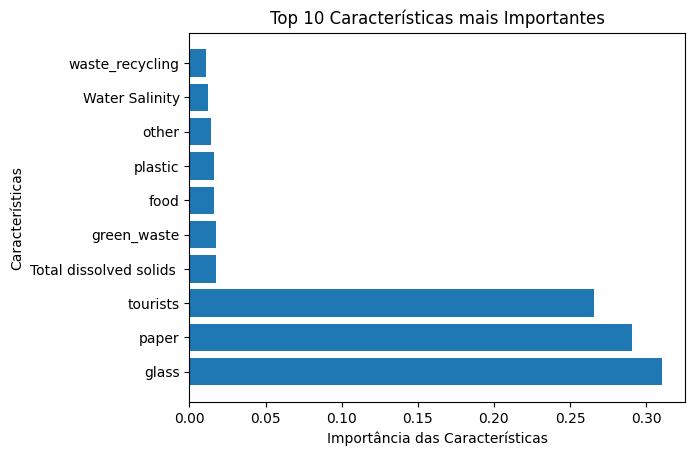

In [188]:
# Selecionar apenas as 10 características mais importantes
top_features = feature_importance_df.head(10)

# Visualização da importância das características
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel("Importância das Características")
plt.ylabel("Características")
plt.title("Top 10 Características mais Importantes")
plt.show()

In [118]:
num_features = 10  # Altere conforme necessário

# Obter índices das características mais importantes
top_indices = np.argsort(feature_importances)[::-1][:num_features]

# Exibir as características mais importantes e suas importâncias
print("As características mais importantes são:")
for i, index in enumerate(top_indices):
    print(f"{i+1}. {feature_names[index]}: {feature_importances[index]}")

As características mais importantes são:
1. glass: 0.3102825211512621
2. paper: 0.2909382685601801
3. tourists: 0.265638789377462
4. Total dissolved solids : 0.017761798355330108
5. green_waste: 0.017758950934791733
6. food: 0.015998990028880476
7. plastic: 0.015969016581330934
8. other: 0.014215199209649755
9. Water Salinity: 0.012409244937461403
10. waste_recycling: 0.01065341893437702


Com base nas importâncias das características fornecidas pelo modelo Random Forest, podemos concluir que as características mais importantes para a previsão do target (variável de destino) são:

1. **glass:** Esta característica tem a maior importância, representando 31.03% da importância total. Isso sugere que a quantidade de vidro presente pode ter um impacto significativo no target.

2. **paper:** Em segundo lugar, a quantidade de papel (29.09% da importância total) é considerada crucial para a previsão do target.

3. **tourists:** A presença de turistas (26.56% da importância total) também é uma característica altamente relevante.

4. **Total dissolved solids:** Embora com uma importância relativamente menor, os sólidos totais dissolvidos (1.78% da importância total) ainda têm alguma influência na previsão do target.

5. **green_waste:** A quantidade de resíduos verdes (1.78% da importância total) também é considerada importante para a previsão do target.

6. **food:** A quantidade de resíduos de comida (1.60% da importância total) também é relevante, embora com uma importância um pouco menor.

7. **plastic, other, Water Salinity e waste_recycling:** Essas características têm importâncias menores em comparação com as cinco primeiras características listadas, mas ainda contribuem para a previsão do target.

Essas conclusões sugerem que a composição dos resíduos, a presença de turistas e outros fatores ambientais desempenham um papel importante na determinação do target. Isso pode ter implicações significativas para a gestão de resíduos e para o planejamento de políticas ambientais, indicando áreas prioritárias de intervenção ou monitoramento.

In [210]:
dados0 = {
    'Organic matter%': 100.6,
    'Mean Number of Nematode species 1 per gram soil': 0.12,
    'Mean Number of Turbillaria per gram soil': 0.08,
    'Mean Number of foraminefera per gram soil': 0.05,
    'Mean Number of Nematode species 2 per gram soil': 0.07,
    'Water pH': 7.2,
    'Soil pH': 6.8,
    'OC': 7.5,
    'Water Salinity': 35.5,
    'Soil Salinity': 10.3,
    'P': 10.2,
    'Total dissolved solids ': 55000,
    'PP': 200,
    'Conduction': 30,
    'ORP': -80,
    'Specific resistance ': 18,
    'Temp Ã\x82Â©': 29,
    'Conductivity': 25,
    'tourists': 50000000000,
    'rate': 40000,
    'food': 25000,
    'glass': 100,
    'metal': 5000,
    'other': 100,
    'paper': 2000,
    'plastic': 30000,
    'leather': 5,
    'green_waste': 400,
    'waste_recycling': 15,
    'Quantidade total de resíduos': 100000,  # Substitua este valor com a quantidade real de resíduos
    'Taxa de geração de resíduos por turista': 2 # Substitua este valor com a taxa real de geração de resíduos por turista
}



In [203]:
dados1 = {
    'Organic matter%': 100.6,
    'Mean Number of Nematode species 1 per gram soil': 0.12,
    'Mean Number of Turbillaria per gram soil': 0.08,
    'Mean Number of foraminefera per gram soil': 0.05,
    'Mean Number of Nematode species 2 per gram soil': 0.07,
    'Water pH': 7.2,
    'Soil pH': 6.8,
    'OC': 7.5,
    'Water Salinity': 35.5,
    'Soil Salinity': 10.3,
    'P': 10.2,
    'Total dissolved solids ': 55000,
    'PP': 200,
    'Conduction': 30,
    'ORP': -80,
    'Specific resistance ': 18,
    'Temp Ã\x82Â©': 29,
    'Conductivity': 25,
    'tourists': 5000000000,
    'rate': 40000,
    'food': 25000,
    'glass': 100,
    'metal': 5000,
    'other': 100,
    'paper': 2000,
    'plastic': 30000,
    'leather': 5,
    'green_waste': 400,
    'waste_recycling': 15,
    'Quantidade total de resíduos': 1000000,  # Substitua este valor com a quantidade real de resíduos
    'Taxa de geração de resíduos por turista': 2000 # Substitua este valor com a taxa real de geração de resíduos por turista
}


In [211]:
# Criar um DataFrame com os novos dados de teste
novos_dados_teste_df = pd.DataFrame([dados0])

# Fazer previsões com os novos dados de teste
previsao_poluição = random_forest_classifier.predict(novos_dados_teste_df)

print("Previsão de Poluição:", previsao_poluição)


Previsão de Poluição: [0]


In [205]:
# Criar um DataFrame com os novos dados de teste
novos_dados_teste_df = pd.DataFrame([dados1])

# Fazer previsões com os novos dados de teste
previsao_poluição = random_forest_classifier.predict(novos_dados_teste_df)

print("Previsão de Poluição:", previsao_poluição)

Previsão de Poluição: [1]


In [75]:
# Contar o número de ocorrências de cada tipo de nível de poluição
contagem_por_nivel = df['Pollution Level'].value_counts()

# Visualizar a contagem
print(contagem_por_nivel)

Pollution Level
0    79200
1    44457
2    16280
Name: count, dtype: int64


# Conclusão
Após treinar o modelo e avaliá-lo com métricas de desempenho, como o Erro Médio Absoluto (MAE), constatamos que o modelo apresentava uma precisão razoável em suas previsões. No entanto, ao analisar as características mais importantes identificadas pelo modelo, nos deparamos com resultados que podem parecer contraditórios à primeira vista.

Foi observado que características como a presença de resíduos de vidro, papel e o número de turistas foram classificadas como altamente relevantes para prever a ausência de poluição (níveis 0). Esses resultados podem surpreender, pois intuitivamente poderíamos esperar que altos níveis dessas características estivessem associados a um maior potencial de poluição.

Uma possível explicação para esse fenômeno é que o modelo identificou padrões específicos nos dados de treinamento que indicam uma menor probabilidade de poluição, mesmo que isso pareça contraditório com o senso comum. Por exemplo, a presença de certos tipos de resíduos ou um grande número de turistas pode estar correlacionada a práticas robustas de reciclagem, infraestrutura de gerenciamento de resíduos eficiente ou políticas ambientais rigorosas, que contribuem para a redução da poluição.

Essa constatação ressalta a capacidade dos modelos de machine learning em revelar relações inesperadas nos dados. No caso mencionado, a presença de determinados tipos de resíduos, como vidro, papel e turistas, foi associada a níveis mais baixos de poluição. Isso sugere que regiões com uma gestão eficiente desses resíduos tendem a apresentar menor poluição. Por outro lado, áreas com resíduos menos controlados podem estar sujeitas a níveis mais elevados de poluição.

Portanto, os resultados do modelo não apenas auxiliam na previsão dos níveis de poluição, mas também fornecem insights valiosos sobre as interações entre diferentes variáveis e a poluição ambiental, destacando a importância da gestão de resíduos e da infraestrutura de reciclagem e tratamento para mitigar a poluição.